## Cargar las Liberarías:

In [ ]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

## Parámteros de los Gráficos:

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

gender_palette = {
    "Mujeres": "violet", 
    "Hombres": "skyblue",
    "No Binario": "red"
}

partido_palette = {
    "PAN" : "blue",      
    "PRI" : "green",     
    "MORENA" :  "maroon",  
    "PRD" : "yellow",     
    "PVEM" : "lightgreen",
    "Otro" : "pink",    
    "PT" : "red",         
    "MC" : "orange",         
    "NUAL" : "skyblue",       
    "PES" : "violet"        
}

## Cargamos la Información:

In [4]:
%pwd

'/home/barea/trabajo_infantil/analisis_exploratorio'

In [5]:
Elecciones = pd.read_excel('~/trabajo_infantil/data/elecciones/Tibble_datos_elecciones.xlsx')
Elecciones.head(20)

,Año,ID_ESTADO,NOMBRE_ESTADO,Partido,Votos,Votos1,Proporcion,Sexo,Curules,Zona,Espectro,Presidencia,PARTICIPACION,Sufragios
0,2015,3,BAJA CALIFORNIA SUR,MORENA,14321.00,224732,6.37,Mujeres,1,Norte,Izquierda Indefinida,No,0.56,Alto
1,2015,3,BAJA CALIFORNIA SUR,Otro,54524.00,224732,24.26,Hombres,1,Norte,Movimiento Alterno,No,0.56,Alto
2,2015,3,BAJA CALIFORNIA SUR,Otro,54524.00,224732,24.26,Mujeres,1,Norte,Movimiento Alterno,No,0.56,Alto
3,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Hombres,7,Norte,Derecha Extravagante,No,0.56,Alto
4,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Mujeres,6,Norte,Derecha Extravagante,No,0.56,Alto
5,2015,3,BAJA CALIFORNIA SUR,PRD,13170.00,224732,5.86,Mujeres,1,Norte,Izquierda Indefinida,No,0.56,Alto
6,2015,3,BAJA CALIFORNIA SUR,PRI,46277.00,224732,20.59,Hombres,1,Norte,Izquierda Indefinida,Sí,0.56,Alto
7,2015,3,BAJA CALIFORNIA SUR,PRI,46277.00,224732,20.59,Hombres,1,Norte,Izquierda Indefinida,Sí,0.56,Alto
8,2015,3,BAJA CALIFORNIA SUR,PRI,46277.00,224732,20.59,Mujeres,1,Norte,Izquierda Indefinida,Sí,0.56,Alto
9,2015,3,BAJA CALIFORNIA SUR,PT,9861.00,224732,4.39,Hombres,1,Norte,Izquierda Indefinida,No,0.56,Alto


## Conocemos la Cantidad de Variables:

In [6]:
Elecciones.columns

Index(['Año', 'ID_ESTADO', 'NOMBRE_ESTADO', 'Partido', 'Votos', 'Votos1',
       'Proporcion', 'Sexo', 'Curules', 'Zona', 'Espectro', 'Presidencia',
       'PARTICIPACION', 'Sufragios'],
      dtype='object')

## Conocemos los Estadísticos Resumidos por Variable:

In [7]:
Elecciones.describe()

,Año,ID_ESTADO,Votos,Votos1,Proporcion,Curules,PARTICIPACION
count,1221.00,1221.00,1221.00,1221.00,1221.00,1221.00,1221.00
mean,2017.84,16.70,268725.13,1617936.90,17.30,2.59,0.56
std,2.20,9.12,345322.19,1523392.94,12.35,2.57,0.09
min,2015.00,1.00,0.00,224732.00,0.00,1.00,0.23
25%,2016.00,9.00,66339.00,668125.00,6.00,1.00,0.52
50%,2018.00,16.00,148273.00,1136373.00,14.63,2.00,0.57
75%,2020.00,24.00,365848.00,1952746.00,26.87,3.00,0.63
max,2022.00,32.00,3172716.00,7732070.00,59.60,23.00,0.75


## Conocemos la Información general del DataFrame:

In [8]:
Elecciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            1221 non-null   int64  
 1   ID_ESTADO      1221 non-null   int64  
 2   NOMBRE_ESTADO  1221 non-null   object 
 3   Partido        1221 non-null   object 
 4   Votos          1221 non-null   float64
 5   Votos1         1221 non-null   int64  
 6   Proporcion     1221 non-null   float64
 7   Sexo           1221 non-null   object 
 8   Curules        1221 non-null   int64  
 9   Zona           1221 non-null   object 
 10  Espectro       1221 non-null   object 
 11  Presidencia    1221 non-null   object 
 12  PARTICIPACION  1221 non-null   float64
 13  Sufragios      1221 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 133.7+ KB


## Corroboramos la Existencia de Datos Nulos:

In [9]:
Elecciones.isnull().sum()

Año              0
ID_ESTADO        0
NOMBRE_ESTADO    0
Partido          0
Votos            0
Votos1           0
Proporcion       0
Sexo             0
Curules          0
Zona             0
Espectro         0
Presidencia      0
PARTICIPACION    0
Sufragios        0
dtype: int64

## Conocemos la Cantidad de Variables por tipo:

In [10]:
Elecciones.dtypes.value_counts()

object     7
int64      4
float64    3
Name: count, dtype: int64

## Conocemos los registros de una Variable:

In [11]:
Elecciones['Partido'].value_counts()

Partido
PAN       227
PRI       226
MORENA    206
PRD       119
PVEM      110
Otro      103
PT         98
MC         77
NUAL       53
PES         2
Name: count, dtype: int64

## Conocemos las Dimensiones del Conjunto de Datos:

In [12]:
Elecciones.shape

(1221, 14)

## Conocemos la Distribución de Valores Nulos:

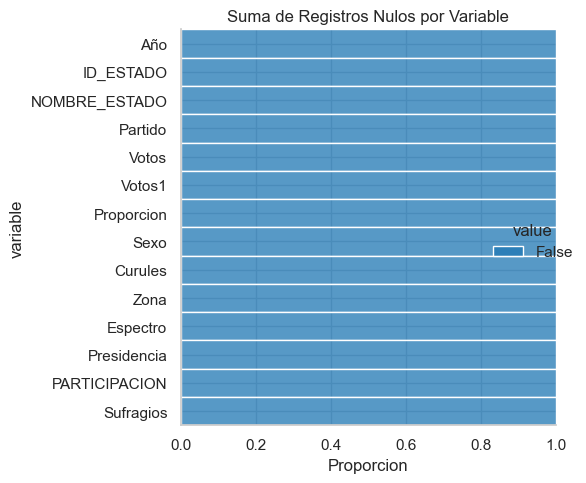

In [13]:
(
    Elecciones.isnull()
    .melt()
    .pipe(
        lambda df: sns.displot(
            data = df,
            y = 'variable',
            hue = 'value',
            multiple = 'fill'
        )
    )
)

plt.title('Suma de Registros Nulos por Variable')
plt.ylabel('variable')
plt.xlabel('Proporcion')
plt.tight_layout()
plt.show()

De esta forma conocemos que en nuestro gráfico tanto en el código como en la visualización no hay presencia de valores nulos.

### Hacemos una Descripción de las Variables Cuantitativas:

In [14]:
Elecciones.select_dtypes(include = np.number).describe()

,Año,ID_ESTADO,Votos,Votos1,Proporcion,Curules,PARTICIPACION
count,1221.00,1221.00,1221.00,1221.00,1221.00,1221.00,1221.00
mean,2017.84,16.70,268725.13,1617936.90,17.30,2.59,0.56
std,2.20,9.12,345322.19,1523392.94,12.35,2.57,0.09
min,2015.00,1.00,0.00,224732.00,0.00,1.00,0.23
25%,2016.00,9.00,66339.00,668125.00,6.00,1.00,0.52
50%,2018.00,16.00,148273.00,1136373.00,14.63,2.00,0.57
75%,2020.00,24.00,365848.00,1952746.00,26.87,3.00,0.63
max,2022.00,32.00,3172716.00,7732070.00,59.60,23.00,0.75


In [15]:
Elecciones.describe(include=np.number)
#esta es otra forma de obtener el mismo resultado anterior.

,Año,ID_ESTADO,Votos,Votos1,Proporcion,Curules,PARTICIPACION
count,1221.00,1221.00,1221.00,1221.00,1221.00,1221.00,1221.00
mean,2017.84,16.70,268725.13,1617936.90,17.30,2.59,0.56
std,2.20,9.12,345322.19,1523392.94,12.35,2.57,0.09
min,2015.00,1.00,0.00,224732.00,0.00,1.00,0.23
25%,2016.00,9.00,66339.00,668125.00,6.00,1.00,0.52
50%,2018.00,16.00,148273.00,1136373.00,14.63,2.00,0.57
75%,2020.00,24.00,365848.00,1952746.00,26.87,3.00,0.63
max,2022.00,32.00,3172716.00,7732070.00,59.60,23.00,0.75


## Hacemos una Descripción de las Variables Cualitativas:

In [16]:
Elecciones.select_dtypes(include = object).describe()

,NOMBRE_ESTADO,Partido,Sexo,Zona,Espectro,Presidencia,Sufragios
count,1221,1221,1221,1221,1221,1221,1221
unique,32,10,3,5,3,2,3
top,MEXICO,PAN,Hombres,Centro,Izquierda Indefinida,No,Alto
freq,53,227,624,370,889,832,1012


## Hacemos una Gráfica con los Datos Agrupados por los Partidos con Mayor Frecuencia:

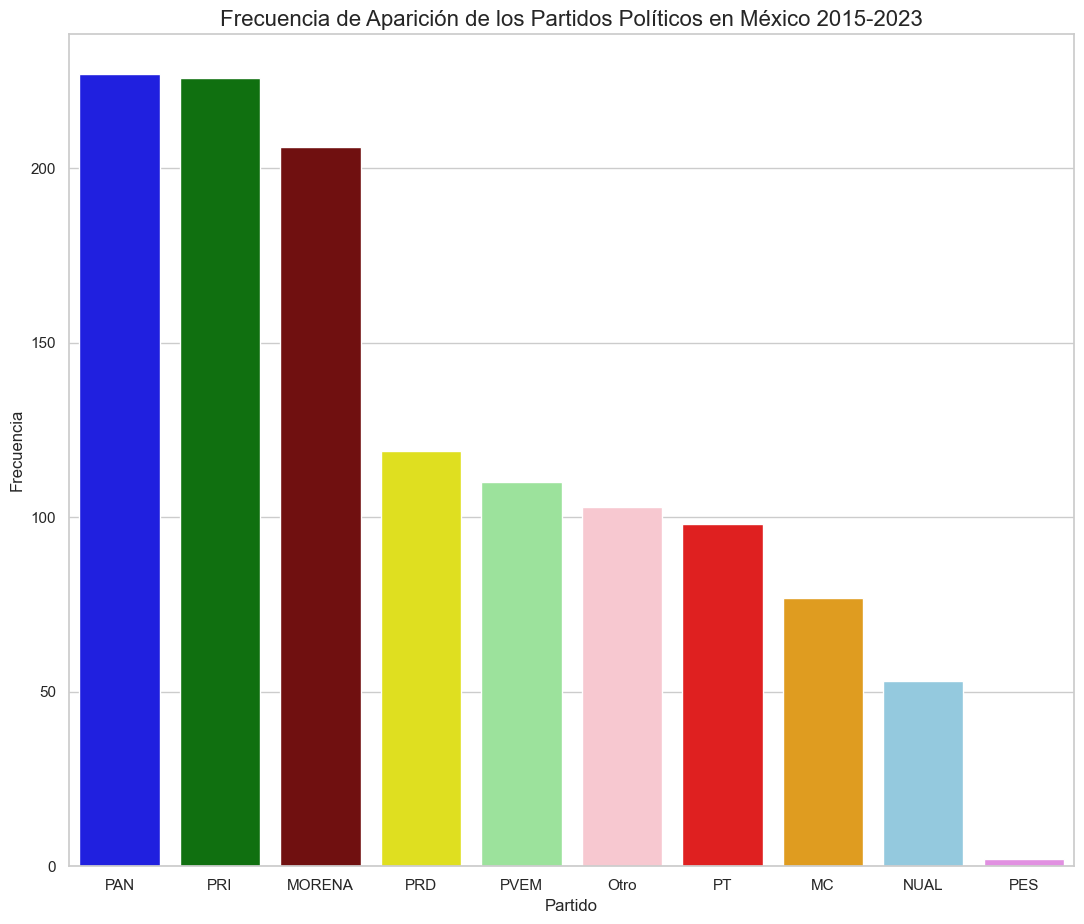

In [17]:
(
    Elecciones
    .value_counts('Partido', sort = True)
    .reset_index(name = 'Frecuencia')
    .pipe(
        lambda df: sns.barplot(
            data = df,
            x = 'Partido',
            hue = 'Partido',
            y = 'Frecuencia',
            palette = partido_palette
        )
    )
)

plt.title('Frecuencia de Aparición de los Partidos Políticos en México 2015-2023', size = 16)
plt.xlabel('Partido')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

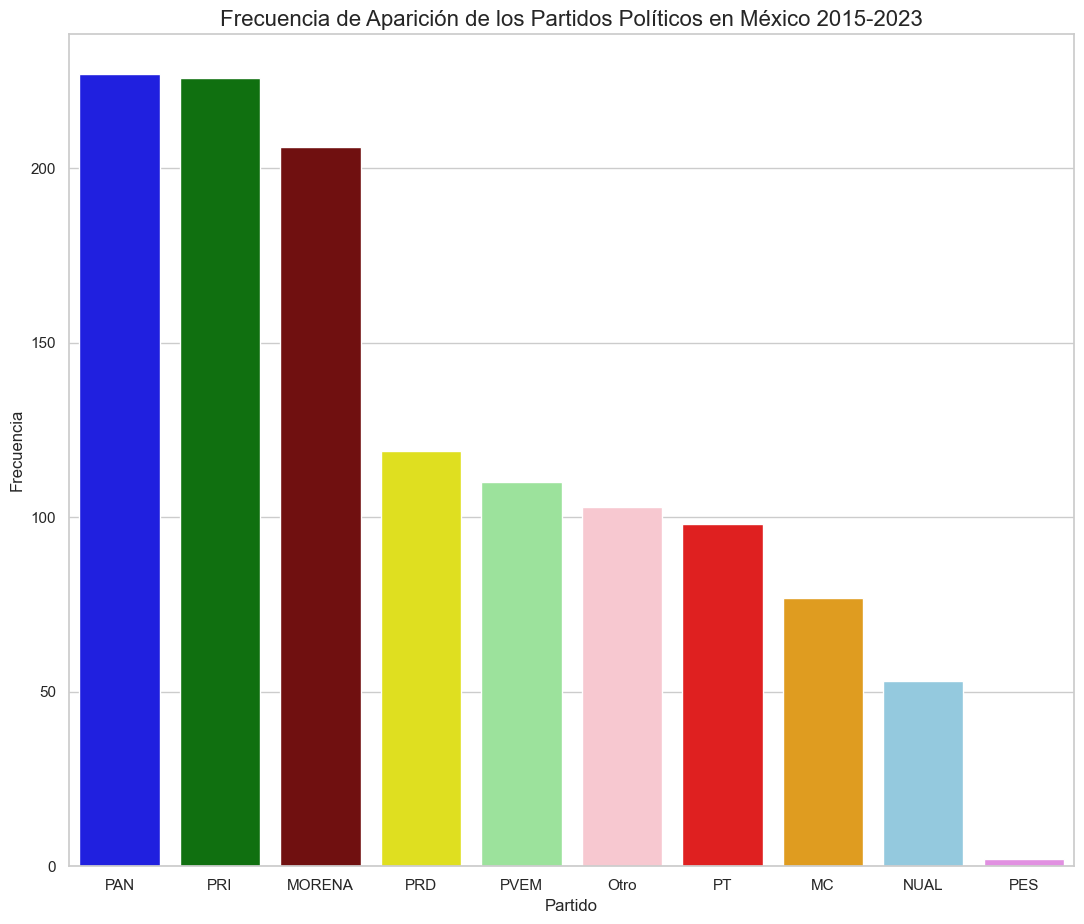

In [18]:
# esta es otra forma de obtener el resultado con groupby:

(
    Elecciones
    .groupby('Partido', sort = False)
    .size()
    .reset_index(name = 'Frecuencia')
    .sort_values(by = 'Frecuencia', ascending= False)
    .pipe(
        lambda df: sns.barplot(
            data = df,
            x = 'Partido',
            hue = 'Partido',
            y = 'Frecuencia',
            palette = partido_palette
        )
    )
)

plt.title('Frecuencia de Aparición de los Partidos Políticos en México 2015-2023', size = 16)
plt.xlabel('Partido')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [19]:
Elecciones.columns

Index(['Año', 'ID_ESTADO', 'NOMBRE_ESTADO', 'Partido', 'Votos', 'Votos1',
       'Proporcion', 'Sexo', 'Curules', 'Zona', 'Espectro', 'Presidencia',
       'PARTICIPACION', 'Sufragios'],
      dtype='object')

## Creamos un Gráfico de Barras que Secciona la Frecuencia de Aparción de los Partidos por Sexo en el Conjunto de Datos:

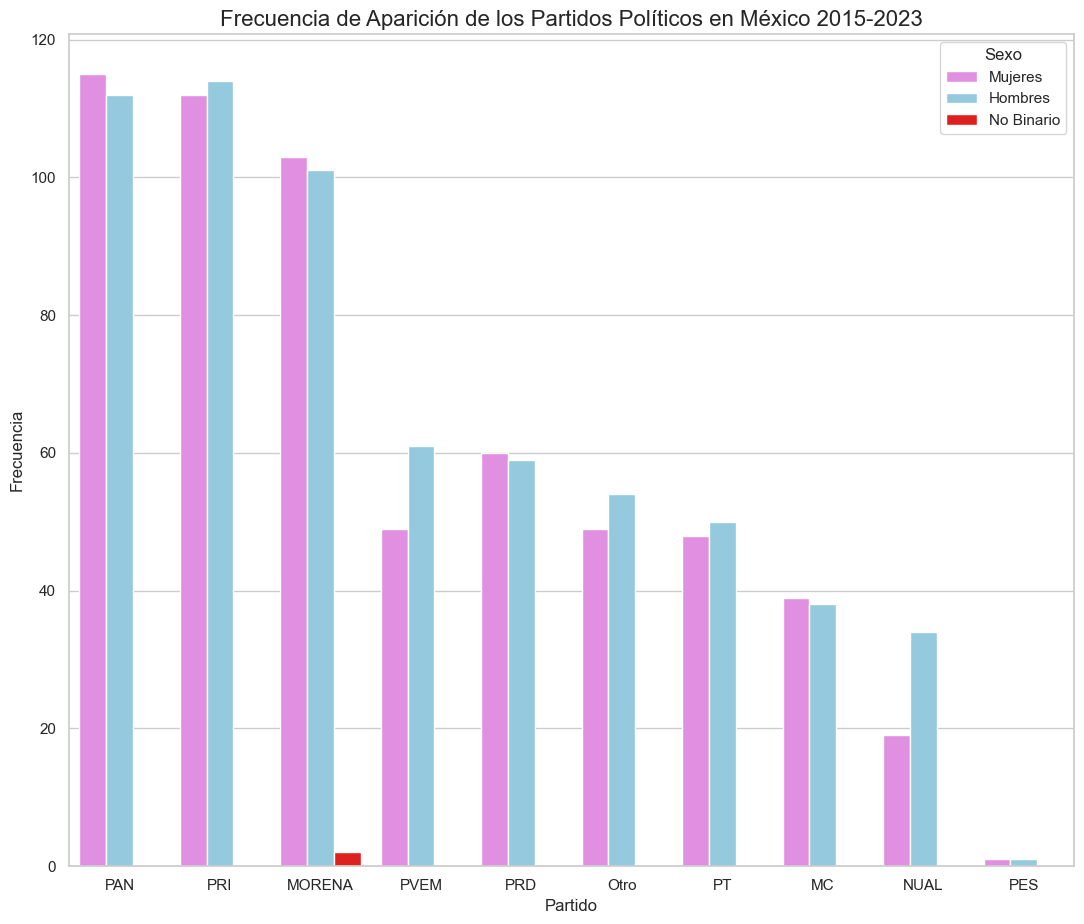

In [20]:
# esta es otra forma de obtener el resultado con groupby:

(
    Elecciones
    .groupby(['Partido', 'Sexo'], sort = False)
    .size()
    .reset_index(name = 'Frecuencia')
    .sort_values(by = 'Frecuencia', ascending= False)
    .pipe(
        lambda df: sns.barplot(
            data = df,
            x = 'Partido',
            hue = 'Sexo',
            y = 'Frecuencia',
            palette = gender_palette
        )
    )
)

plt.title('Frecuencia de Aparición de los Partidos Políticos en México 2015-2023', size = 16)
plt.xlabel('Partido')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Creamos un gráfico de las Proporciones del Sexo en el Conjunto de Datos:

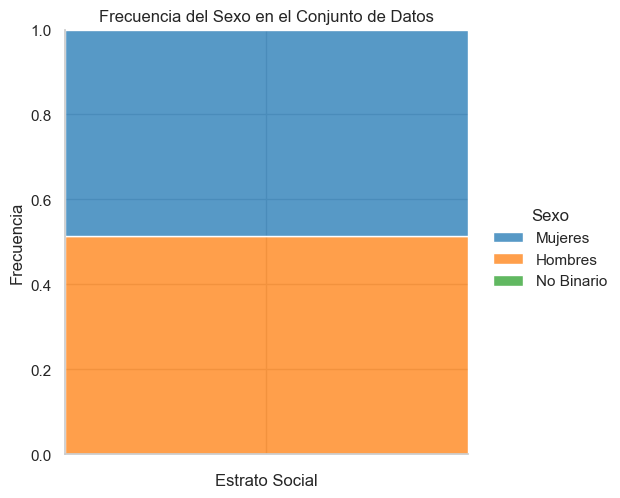

In [21]:
(
    Elecciones
    .add_column('x', '')
    .pipe(
        lambda df: sns.displot(
            data = df,
            x = 'x',
            hue = 'Sexo',
            multiple = 'fill'
        )
    )
)

plt.title('Frecuencia del Sexo en el Conjunto de Datos')
plt.xlabel('Estrato Social')
plt.ylabel('Frecuencia')
plt.show()

## Curules Conseguidas por los Partidos Políticos:

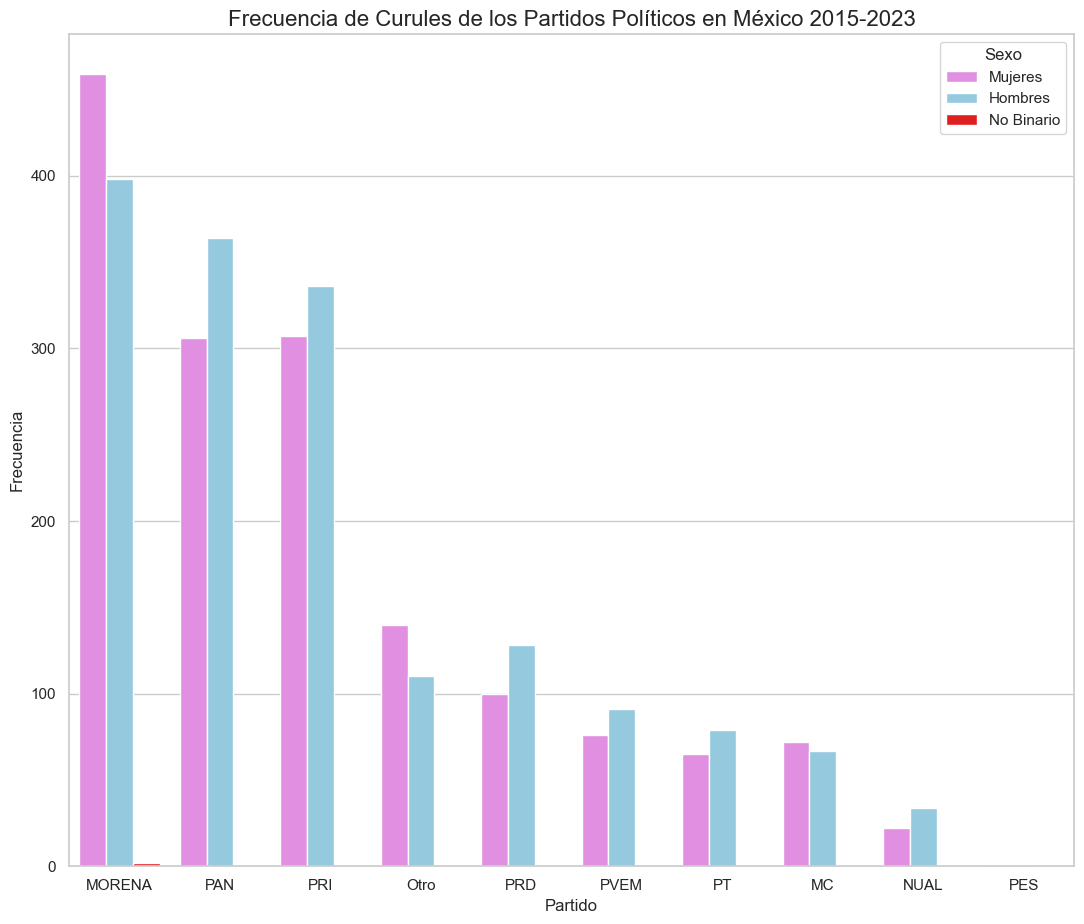

In [22]:
(
    Elecciones.groupby(['Partido', 'Sexo'])['Curules'].sum().reset_index()
    .sort_values(by = 'Curules', ascending= False)
    .pipe(
        lambda df: sns.barplot(
            data = df,
            x = 'Partido',
            hue = 'Sexo',
            y = 'Curules',
            palette = gender_palette
        )
    )
)

plt.title('Frecuencia de Curules de los Partidos Políticos en México 2015-2023', size = 16)
plt.xlabel('Partido')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Gráfica de Puntos sobre los Votos Obtenidos por los Partidos Políticos por Año:

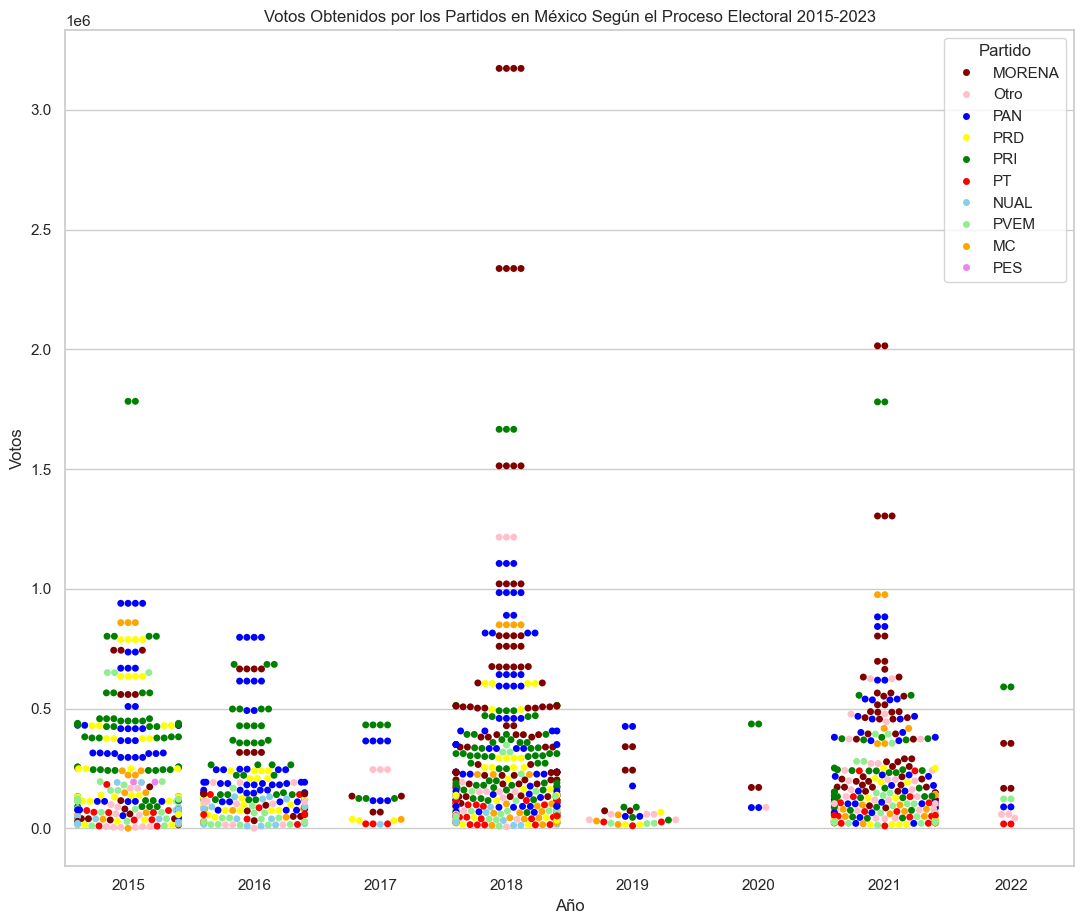

In [23]:
(
    Elecciones
    .pipe(
        lambda df: sns.swarmplot(
            data = df,
            x = 'Año',
            y = 'Votos',
            hue = 'Partido',
            palette = partido_palette
        )
    )
)

plt.title('Votos Obtenidos por los Partidos en México Según el Proceso Electoral 2015-2023')
plt.xlabel('Año')
plt.ylabel('Votos')
plt.tight_layout()
plt.show()

## Boxplot sobre los Votos de los Partidos Políticos entre 2015 - 2023:

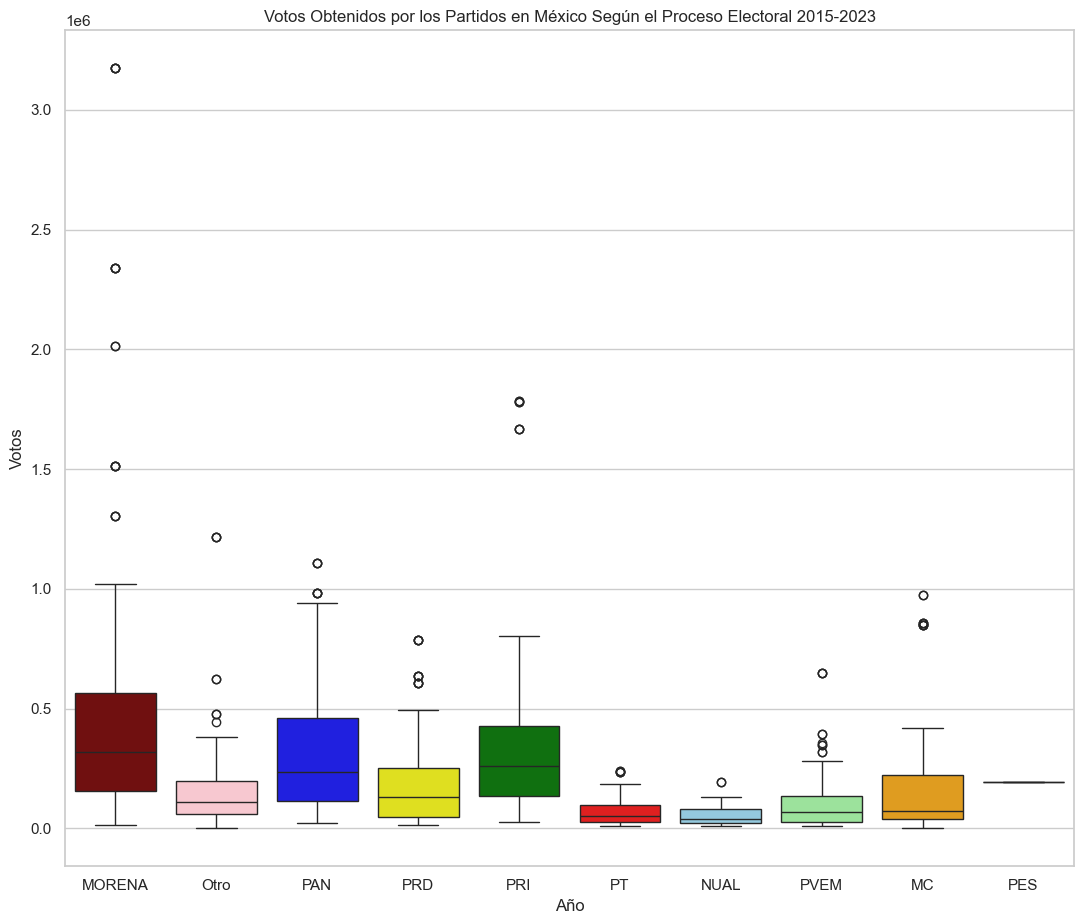

In [24]:
(
    Elecciones
    .pipe(
        lambda df: sns.boxplot(
            data = df,
            x = 'Partido',
            y = 'Votos',
            palette = partido_palette
        )
    )
)

plt.title('Votos Obtenidos por los Partidos en México Según el Proceso Electoral 2015-2023')
plt.xlabel('Año')
plt.ylabel('Votos')
plt.tight_layout()
plt.show()

## Violinplot de los Votos Obtenidos por los Partidos según el Proceso Electoral:

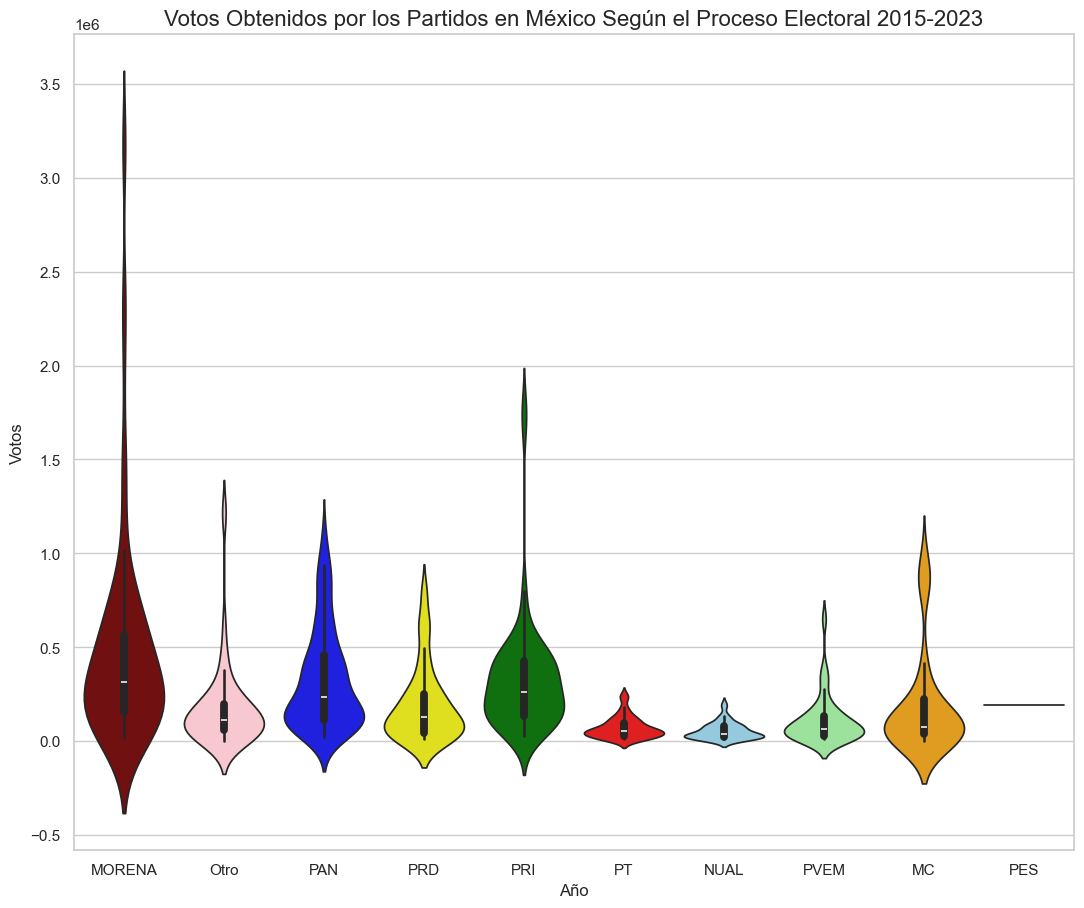

In [25]:
(
    Elecciones
    .pipe(
        lambda df: sns.violinplot(
            data = df,
            x = 'Partido',
            y = 'Votos',
            palette = partido_palette
        )
    )
)

plt.title('Votos Obtenidos por los Partidos en México Según el Proceso Electoral 2015-2023', size = 16)
plt.xlabel('Año')
plt.ylabel('Votos')
plt.tight_layout()
plt.show()

## Scatterplot entre los Curules y la Participación Electoral:

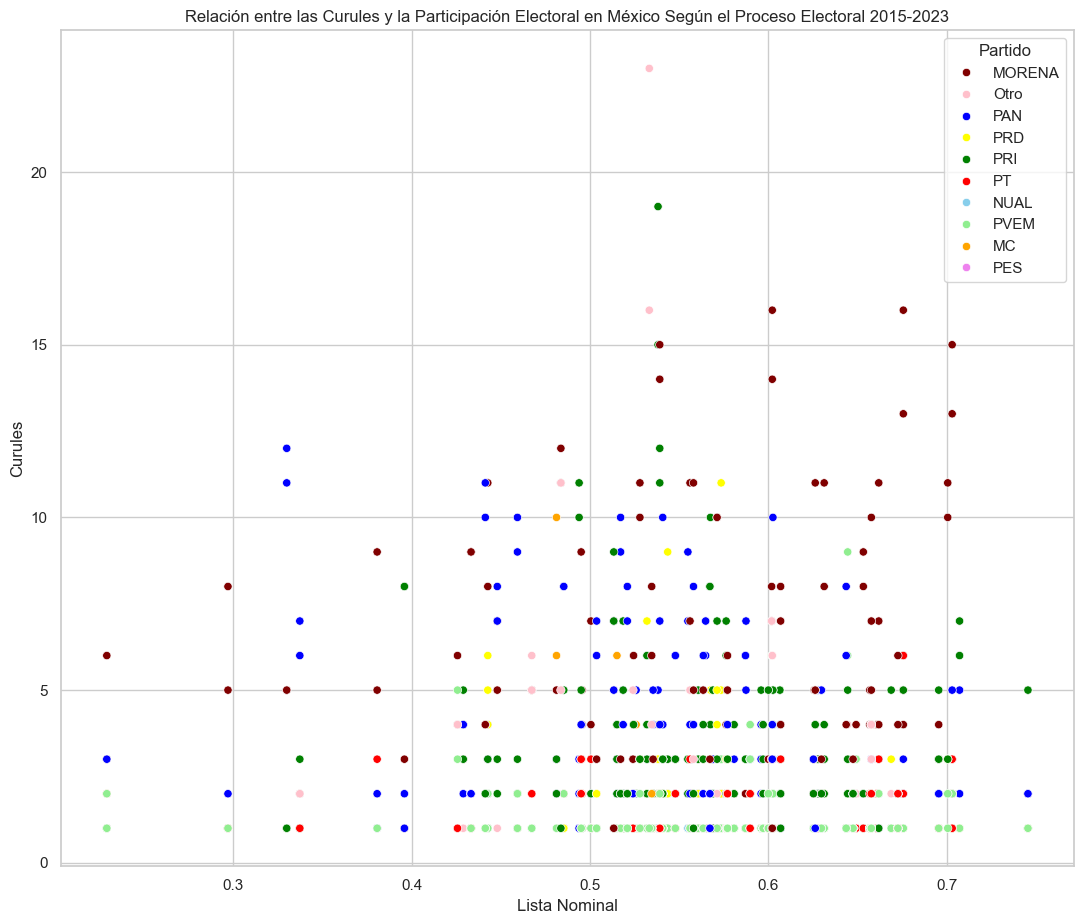

In [26]:
(
    Elecciones
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'PARTICIPACION',
            y = 'Curules',
            hue = 'Partido',
            palette = partido_palette
        )
    )
)

plt.title('Relación entre las Curules y la Participación Electoral en México Según el Proceso Electoral 2015-2023')
plt.xlabel('Lista Nominal')
plt.ylabel('Curules')
plt.tight_layout()
plt.show()

## Jointplot entre los la Participación Electoral y las Curules Obtenidas:

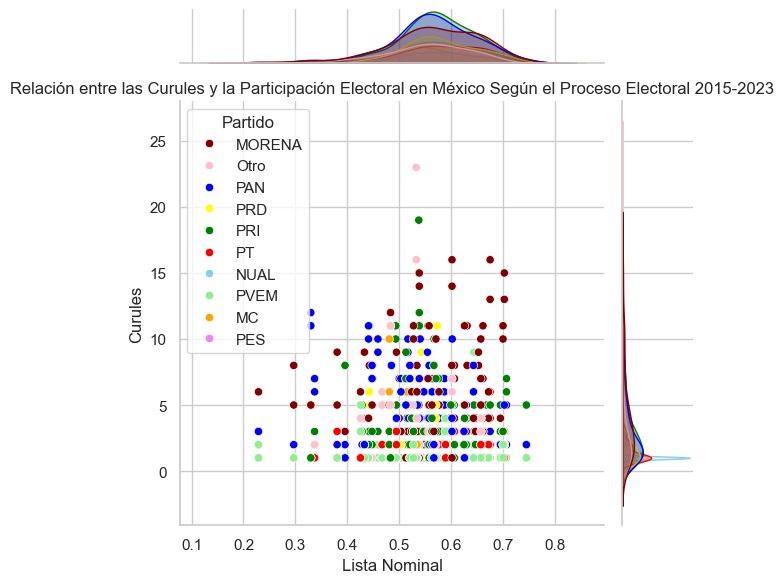

In [27]:
(
    Elecciones
    .pipe(
        lambda df: sns.jointplot(
            data = df,
            x = 'PARTICIPACION',
            y = 'Curules',
            hue = 'Partido',
            palette = partido_palette
        )
    )
)

plt.title('Relación entre las Curules y la Participación Electoral en México Según el Proceso Electoral 2015-2023')
plt.xlabel('Lista Nominal')
plt.ylabel('Curules')
plt.tight_layout()
plt.show()

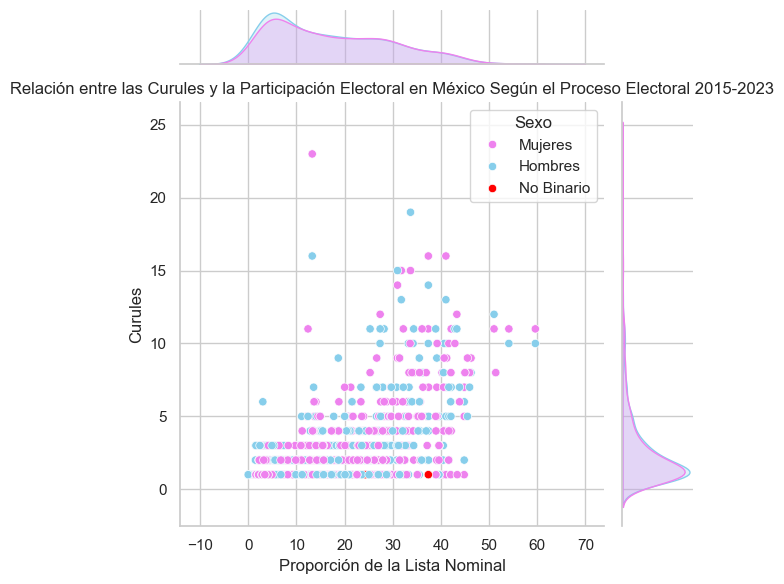

In [28]:
(
    Elecciones
    .pipe(
        lambda df: sns.jointplot(
            data = df,
            x = 'Proporcion',
            y = 'Curules',
            hue = 'Sexo',
            palette = gender_palette
        )
    )
)

plt.title('Relación entre las Curules y la Participación Electoral en México Según el Proceso Electoral 2015-2023')
plt.xlabel('Proporción de la Lista Nominal')
plt.ylabel('Curules')
plt.tight_layout()
plt.show()

## Medidas de Tendencia Central:

### Media:

In [29]:
Elecciones.select_dtypes(include = np.number).mean()

Año                2017.84
ID_ESTADO            16.70
Votos            268725.13
Votos1          1617936.90
Proporcion           17.30
Curules               2.59
PARTICIPACION         0.56
dtype: float64

### Mediana:

In [30]:
Elecciones.select_dtypes(include = np.number).median()

Año                2018.00
ID_ESTADO            16.00
Votos            148273.00
Votos1          1136373.00
Proporcion           14.63
Curules               2.00
PARTICIPACION         0.57
dtype: float64

### Moda:

In [31]:
Elecciones.mode()

,Año,ID_ESTADO,NOMBRE_ESTADO,Partido,Votos,Votos1,Proporcion,Sexo,Curules,Zona,Espectro,Presidencia,PARTICIPACION,Sufragios
0,2018.00,15.00,MEXICO,PAN,90329.00,2858046.00,4.06,Hombres,1.00,Centro,Izquierda Indefinida,No,0.54,Alto
1,NaN,NaN,NaN,NaN,91354.00,NaN,8.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,110440.00,NaN,10.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,112244.00,NaN,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,115937.00,NaN,12.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NaN,NaN,NaN,NaN,983803.00,NaN,41.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,1020427.00,NaN,41.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,1513205.00,NaN,42.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,2337257.00,NaN,42.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Desviación Estándar:

In [32]:
Elecciones.select_dtypes(include = np.number).std()

Año                   2.20
ID_ESTADO             9.12
Votos            345322.19
Votos1          1523392.94
Proporcion           12.35
Curules               2.57
PARTICIPACION         0.09
dtype: float64

### Varianza:

In [33]:
Elecciones.select_dtypes(include = np.number).var()

Año                         4.85
ID_ESTADO                  83.23
Votos            119247411655.30
Votos1          2320726050500.62
Proporcion                152.51
Curules                     6.60
PARTICIPACION               0.01
dtype: float64

## Rango del Conjunto de Datos:

In [34]:
Elecciones.max(numeric_only= True) - Elecciones.min(numeric_only= True)

Año                   7.00
ID_ESTADO            31.00
Votos           3172716.00
Votos1          7507338.00
Proporcion           59.60
Curules              22.00
PARTICIPACION         0.52
dtype: float64

## Rango Intercuartílico:

In [35]:
Elecciones.select_dtypes(include = np.number).quantile(0.75) - Elecciones.select_dtypes(include = np.number).quantile(0.25)

Año                   4.00
ID_ESTADO            15.00
Votos            299509.00
Votos1          1284621.00
Proporcion           20.87
Curules               2.00
PARTICIPACION         0.10
dtype: float64

### Visualización del Rango Intercuatílico:

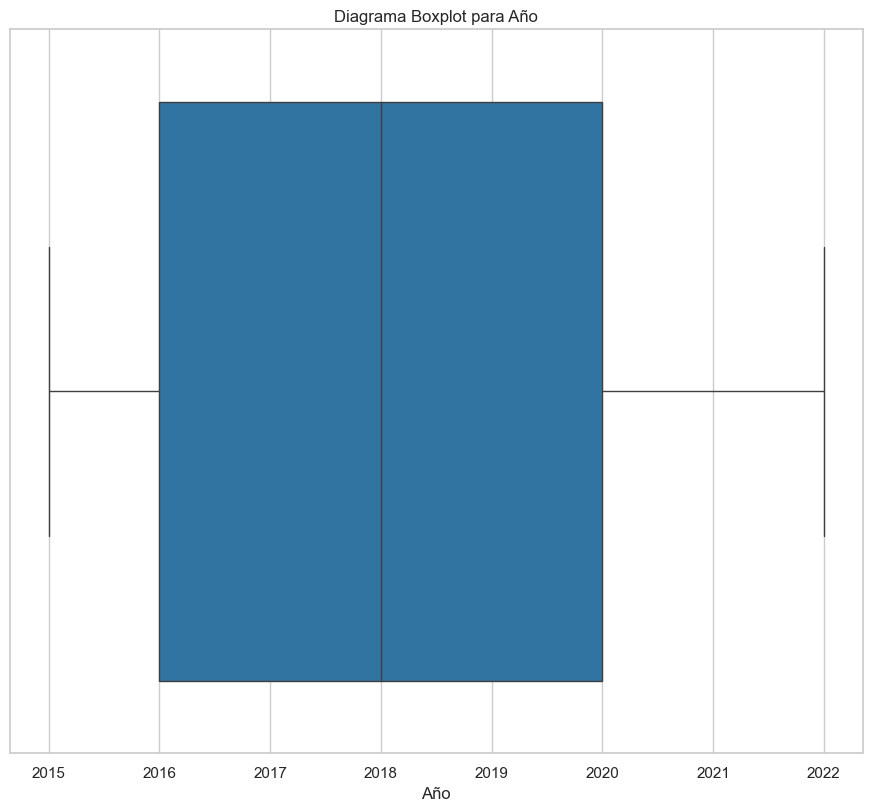

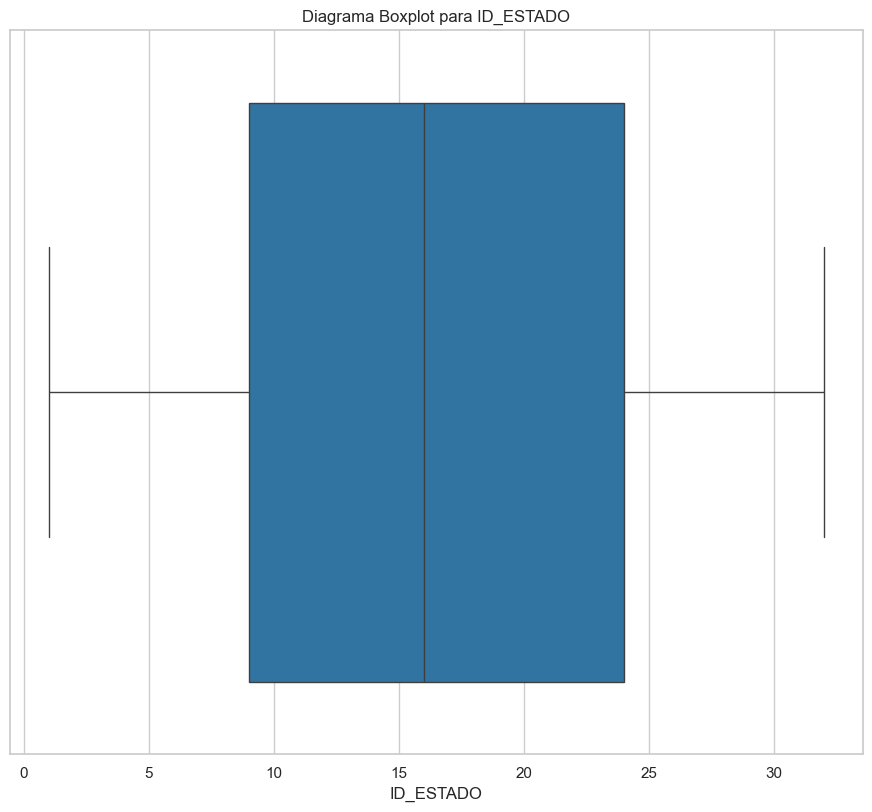

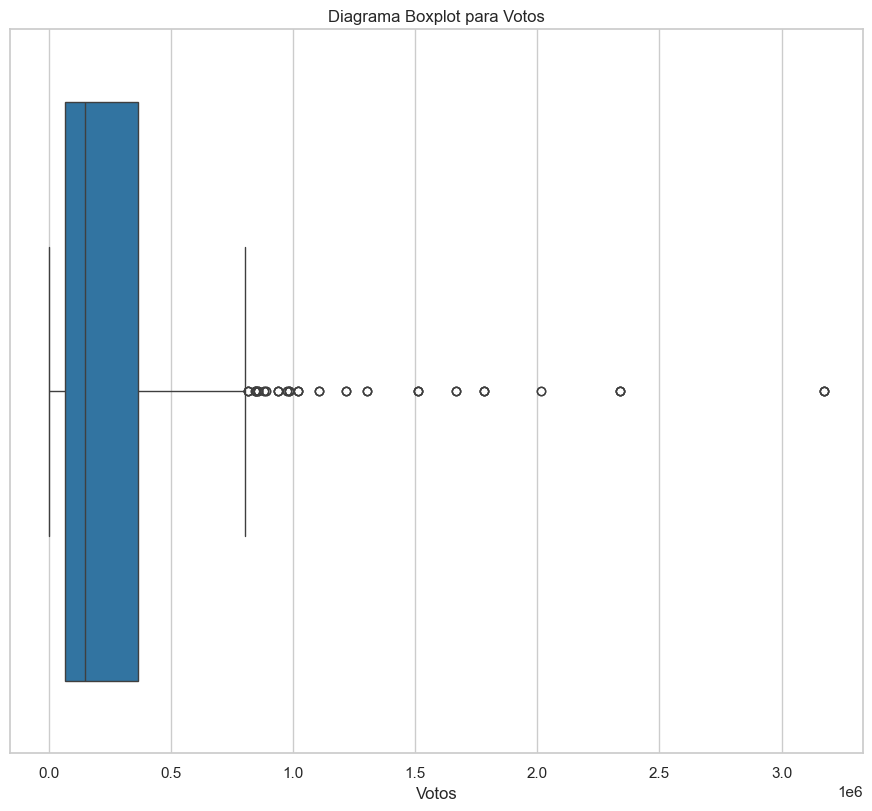

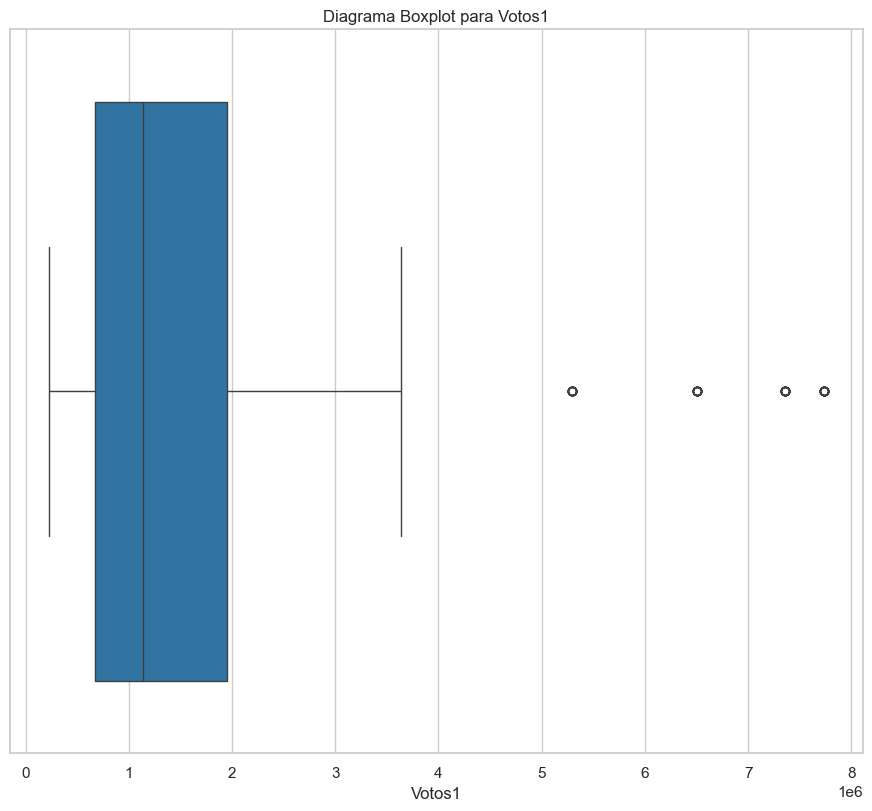

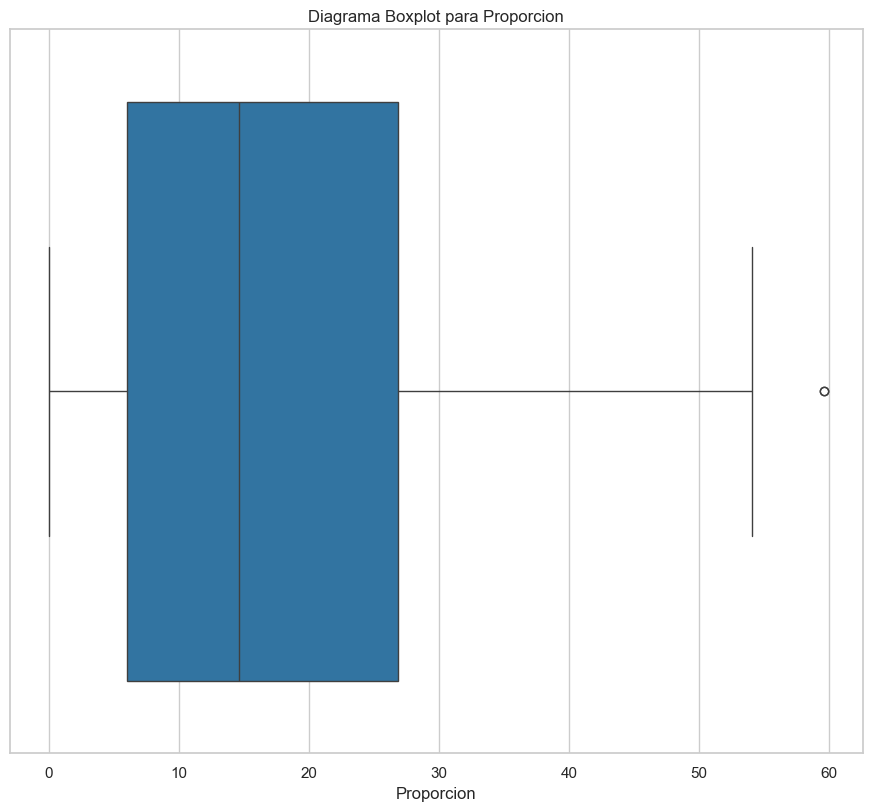

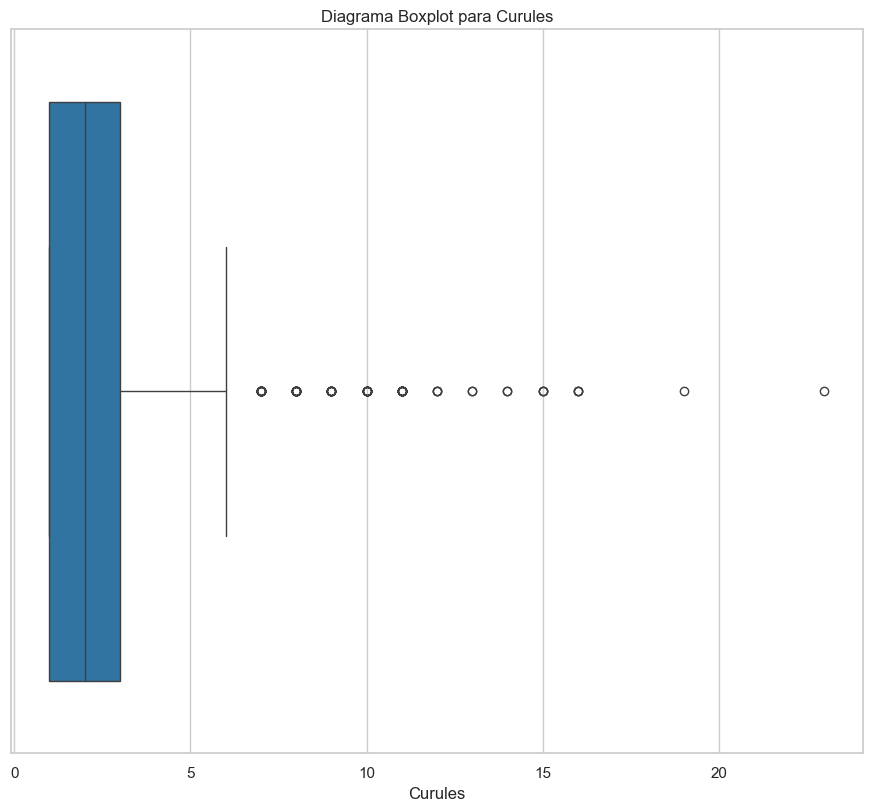

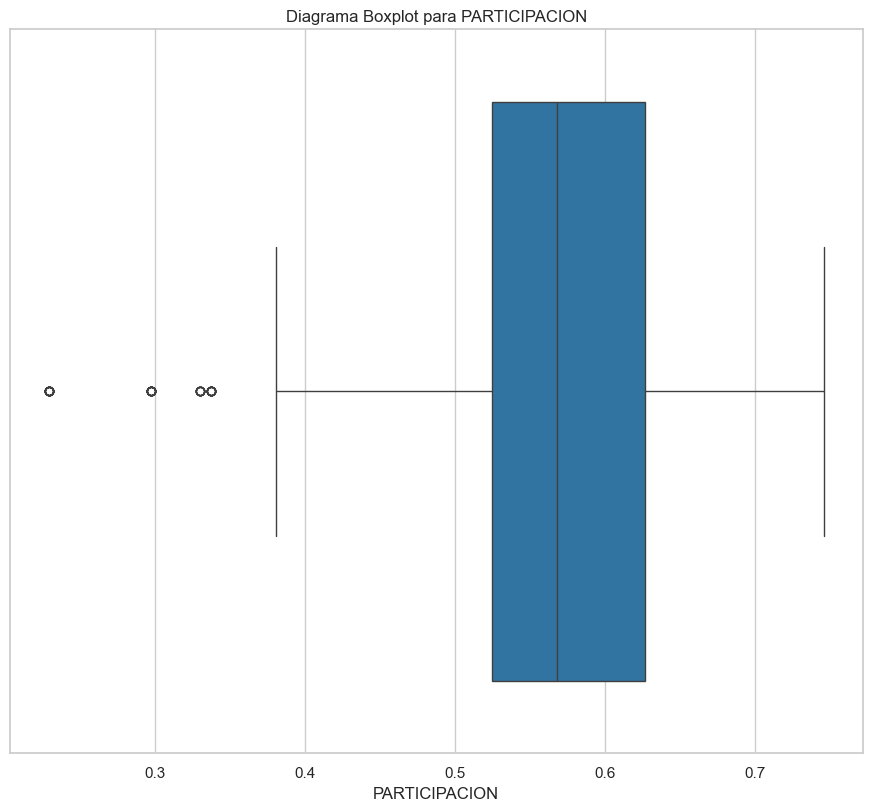

In [36]:
numeric_columns = Elecciones.select_dtypes(include=np.number).columns
for column in numeric_columns:
    sns.boxplot(data=Elecciones, x=column)
    plt.title(f'Diagrama Boxplot para {column}')
    plt.show()

## Observamos los Cuantiles del Conjunto de Datos:

In [37]:
(
    Elecciones.select_dtypes(include = np.number)
    .quantile([0.75, 0.50, 0.25])
    .transpose()
    .assign(
        IQR = lambda df: df[0.75] - df[0.25]
    )
)

,0.75,0.50,0.25,IQR
Año,2020.00,2018.00,2016.00,4.00
ID_ESTADO,24.00,16.00,9.00,15.00
Votos,365848.00,148273.00,66339.00,299509.00
Votos1,1952746.00,1136373.00,668125.00,1284621.00
Proporcion,26.87,14.63,6.00,20.87
Curules,3.00,2.00,1.00,2.00
PARTICIPACION,0.63,0.57,0.52,0.10


### Visualización de los Cuantiles:

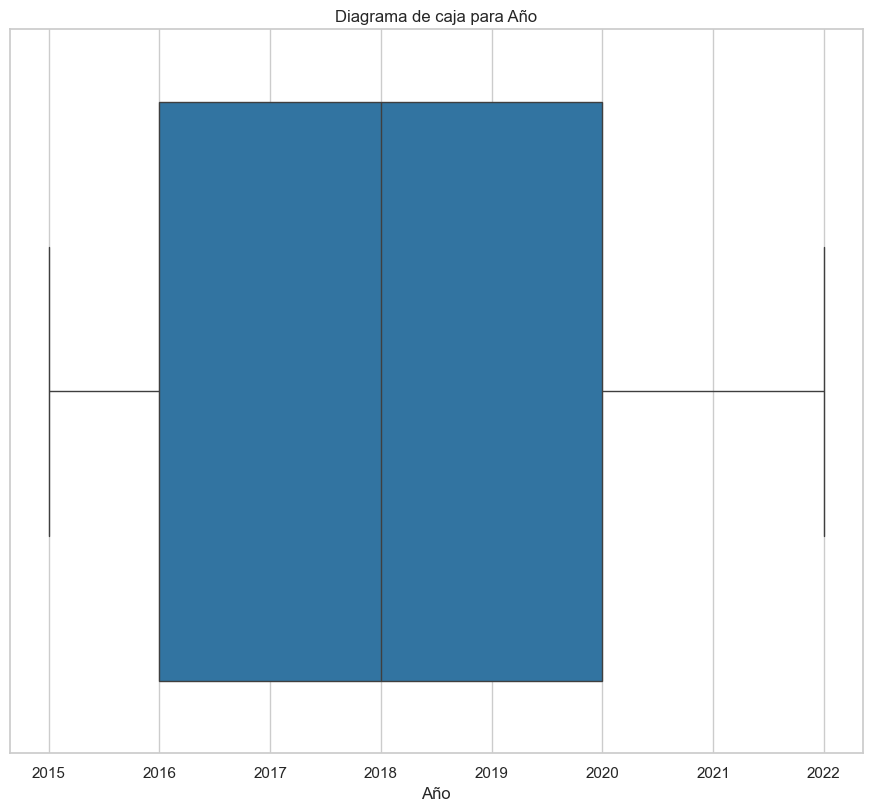

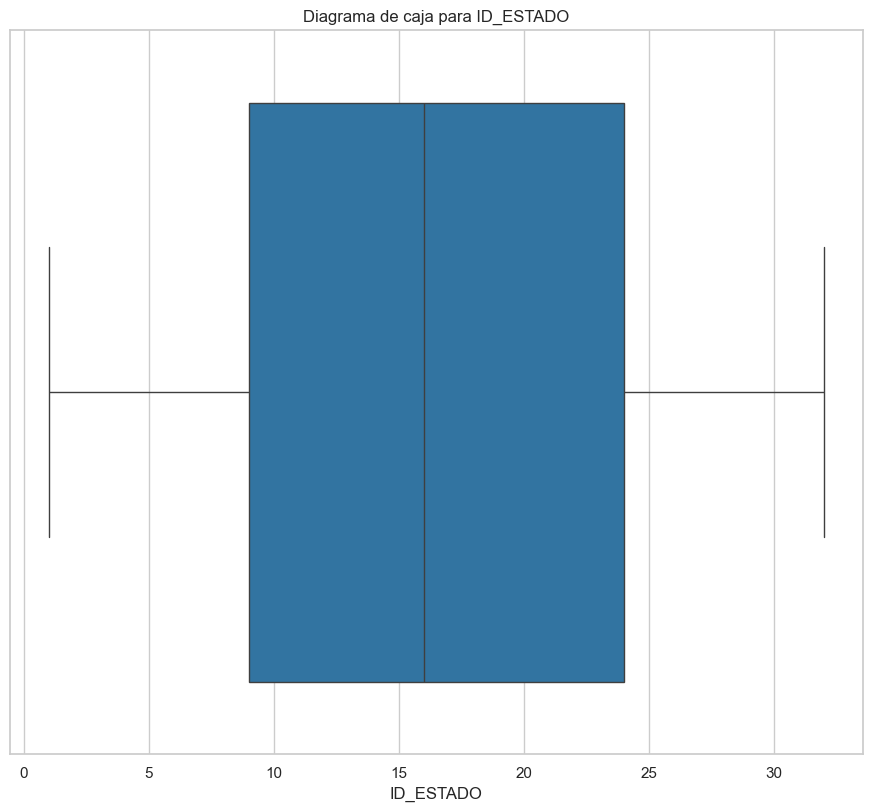

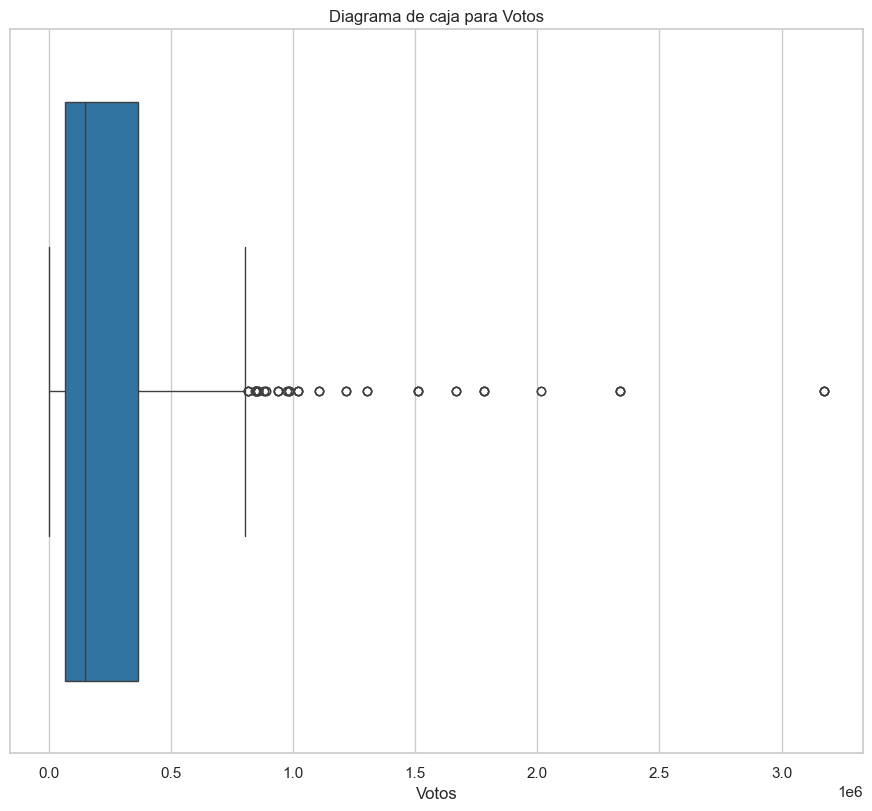

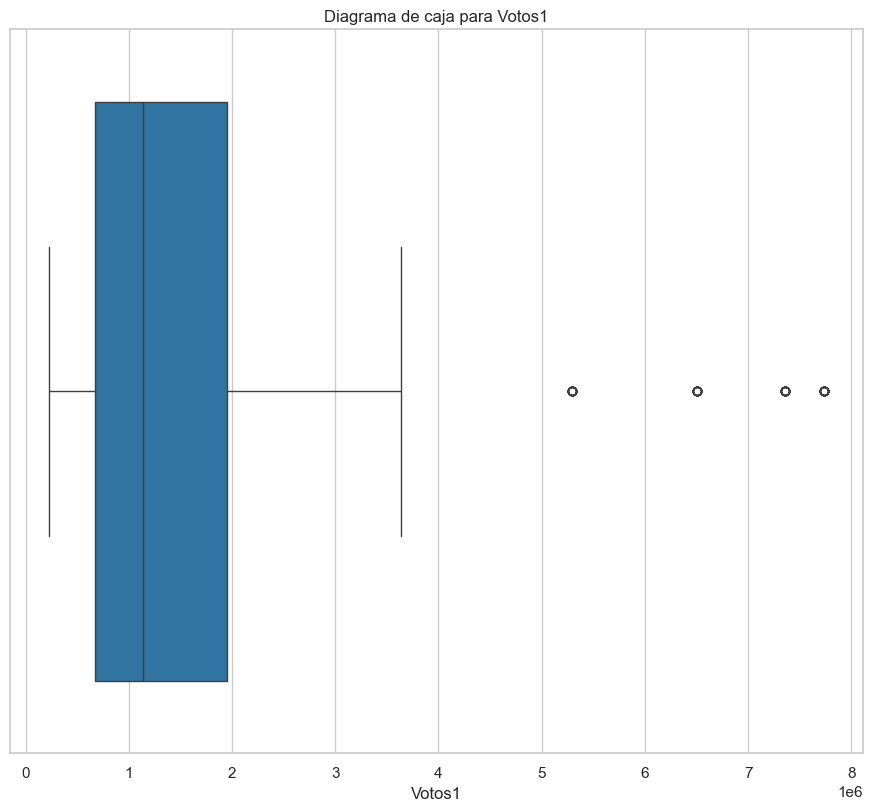

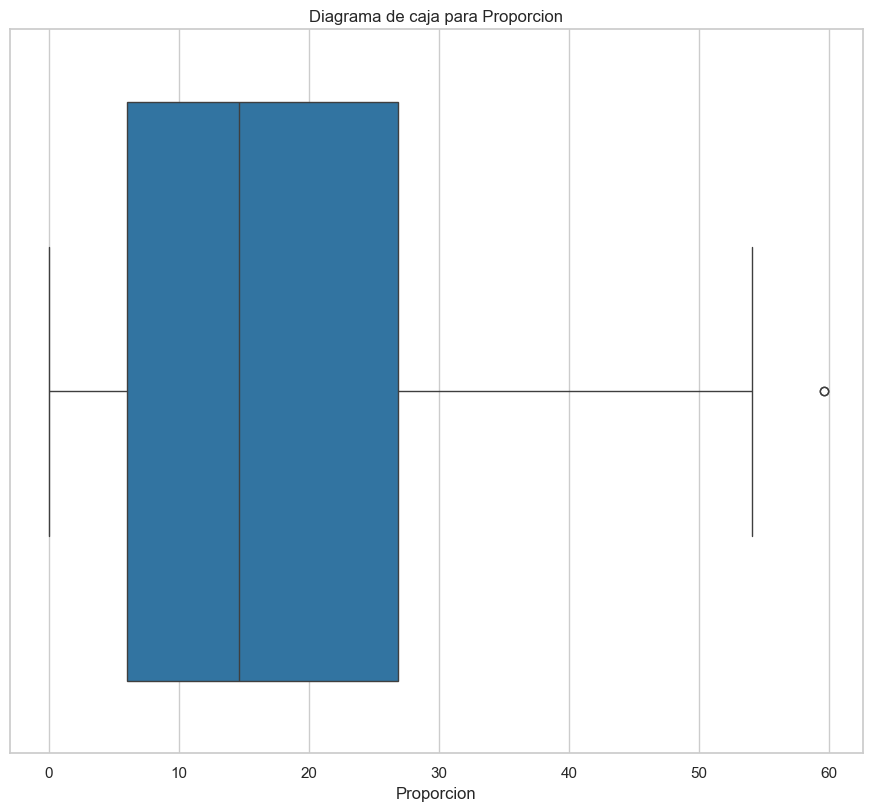

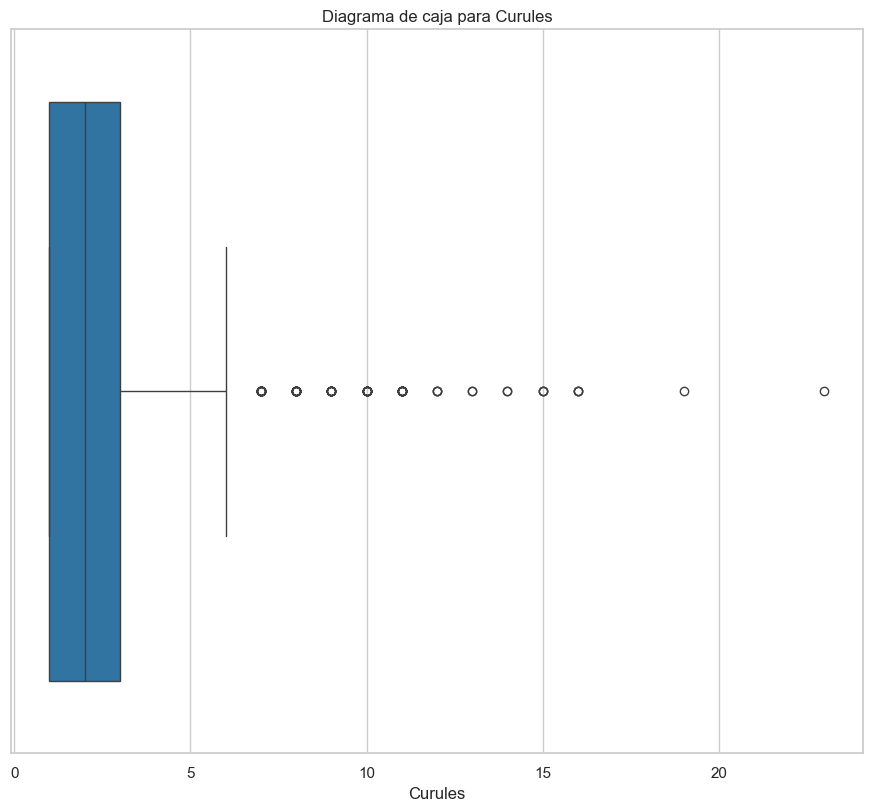

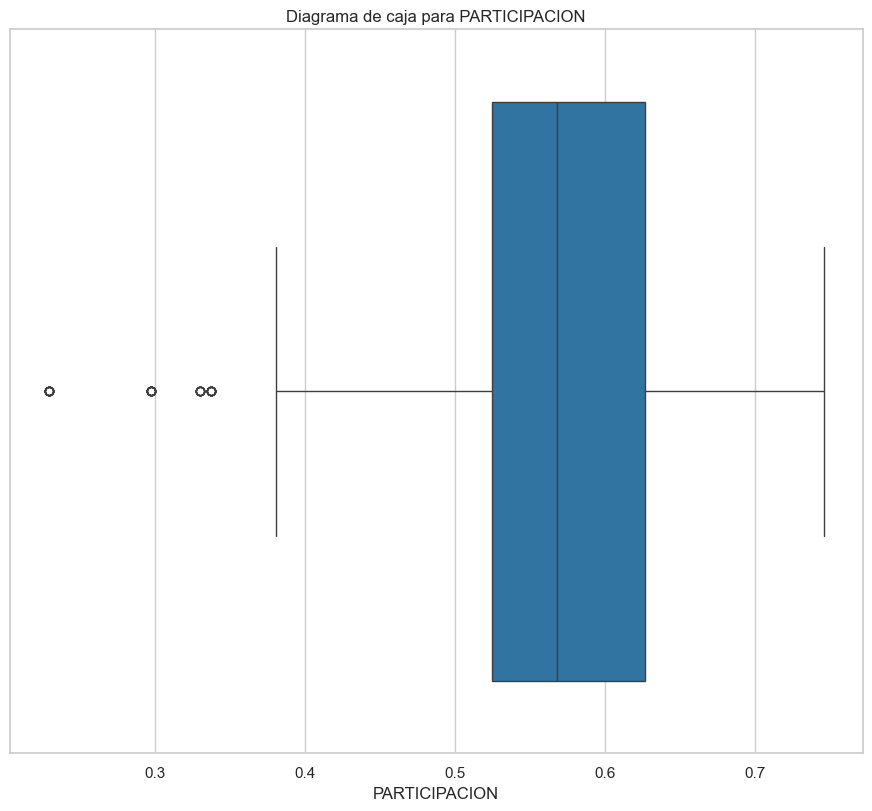

In [38]:
#esta es otra forma de observar el resultado anterior:
variables_numericas = ['Año', 'ID_ESTADO', 'Votos', 'Votos1', 'Proporcion', 'Curules', 'PARTICIPACION']

for variable in variables_numericas:
    sns.boxplot(x=Elecciones[variable])
    plt.title(f'Diagrama de caja para {variable}')
    plt.show()

## Histograma de los Curules en México:

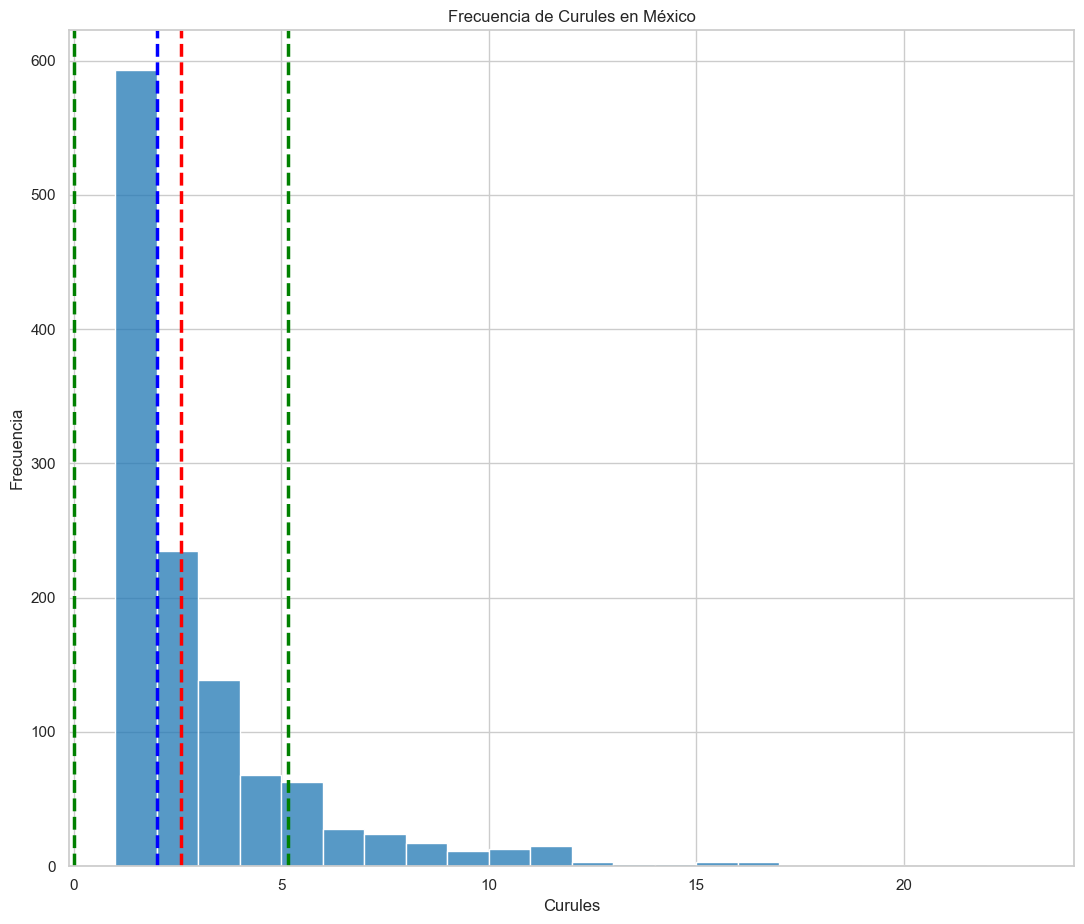

In [39]:
sns.histplot(data = Elecciones, x = 'Curules', binwidth= 1)
plt.title('Frecuencia de Curules en México')
plt.xlabel('Curules')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.axvline(
    x = Elecciones.Curules.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Curules.median(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Curules.mean() - Elecciones.Curules.std(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Curules.mean() + Elecciones.Curules.std(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.show()

## Gráfico de Barras sobre los Curules y Votos Obtenidos por Partido:

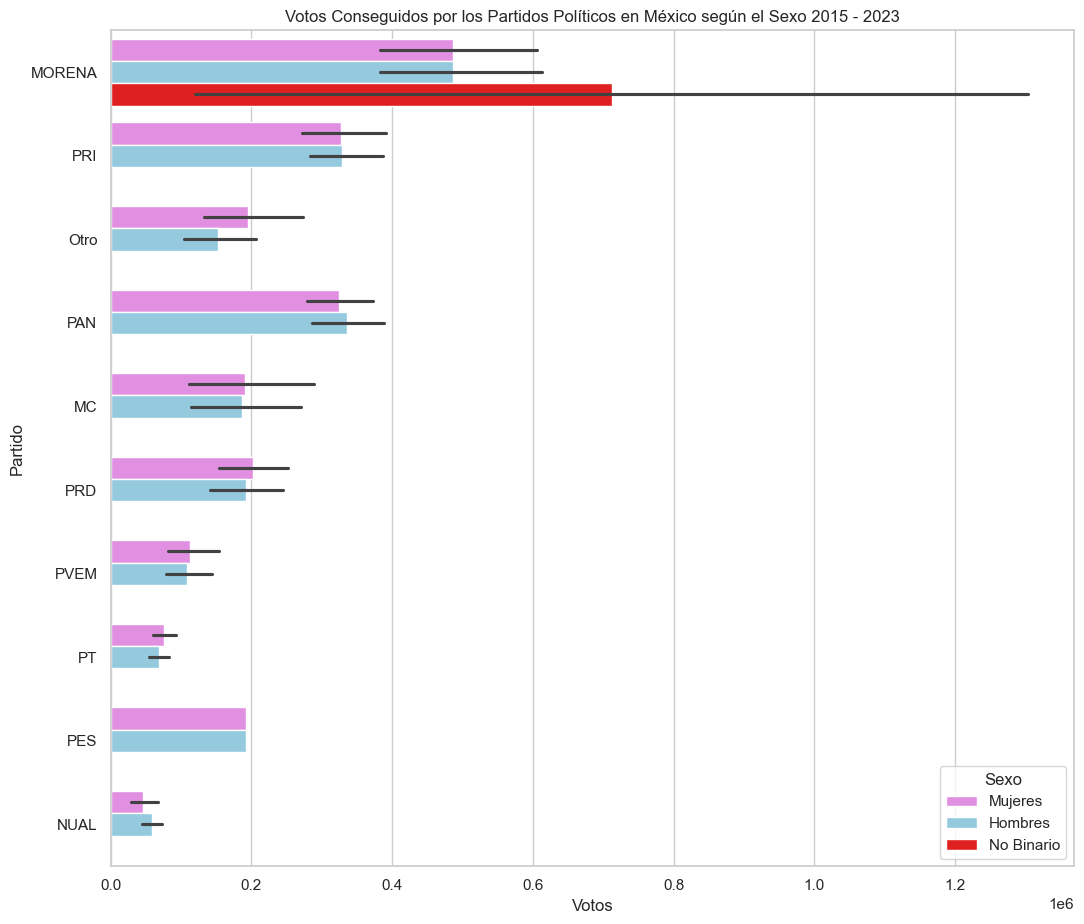

In [40]:
(
    Elecciones
    .sort_values(by = 'Votos', ascending= False)
    .pipe ( 
    lambda df : sns.barplot(
        data = df, 
        x = 'Votos', 
        y = 'Partido',
        hue = 'Sexo',
        palette = gender_palette)
    )
)

plt.title('Votos Conseguidos por los Partidos Políticos en México según el Sexo 2015 - 2023')
plt.xlabel('Votos')
plt.ylabel('Partido')
plt.tight_layout()
plt.show()

## Histograma de los Votos Conseguidos por los Partidos Políticos:

In [41]:
Elecciones['Partido'].value_counts()

Partido
PAN       227
PRI       226
MORENA    206
PRD       119
PVEM      110
Otro      103
PT         98
MC         77
NUAL       53
PES         2
Name: count, dtype: int64

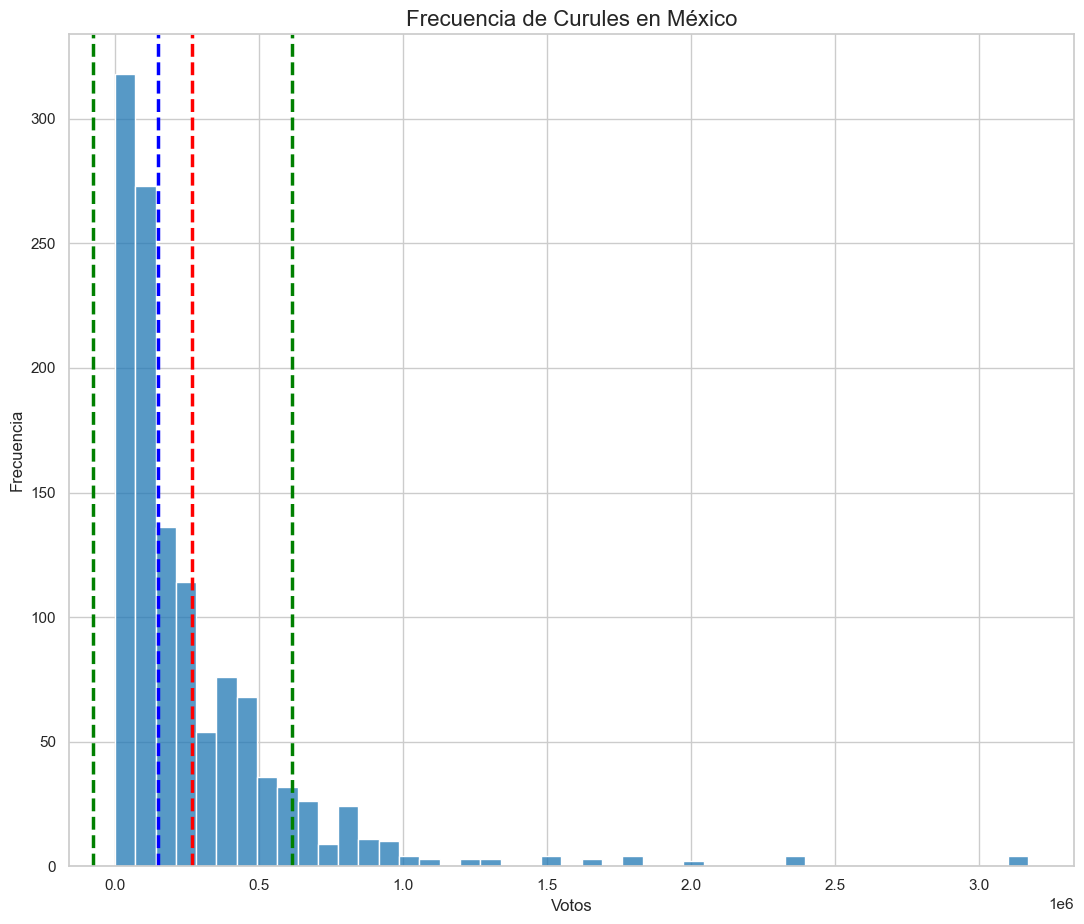

In [42]:
sns.histplot(data = Elecciones, x = 'Votos', binwidth= 70000)
plt.title('Frecuencia de Curules en México', size = 16)
plt.xlabel('Votos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.axvline(
    x = Elecciones.Votos.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Votos.median(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Votos.mean() - Elecciones.Votos.std(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Votos.mean() + Elecciones.Votos.std(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.show()

## Histogramas Iterados por los Votos Obtenidos por los Partidos Políticos:

In [113]:
partidos = (
"PAN",    
"PRI",       
"MORENA",    
"PRD",       
"PVEM",     
"Otro",      
"PT",         
"MC",         
"NUAL"    
)    

In [114]:
partidos

('PAN', 'PRI', 'MORENA', 'PRD', 'PVEM', 'Otro', 'PT', 'MC', 'NUAL')

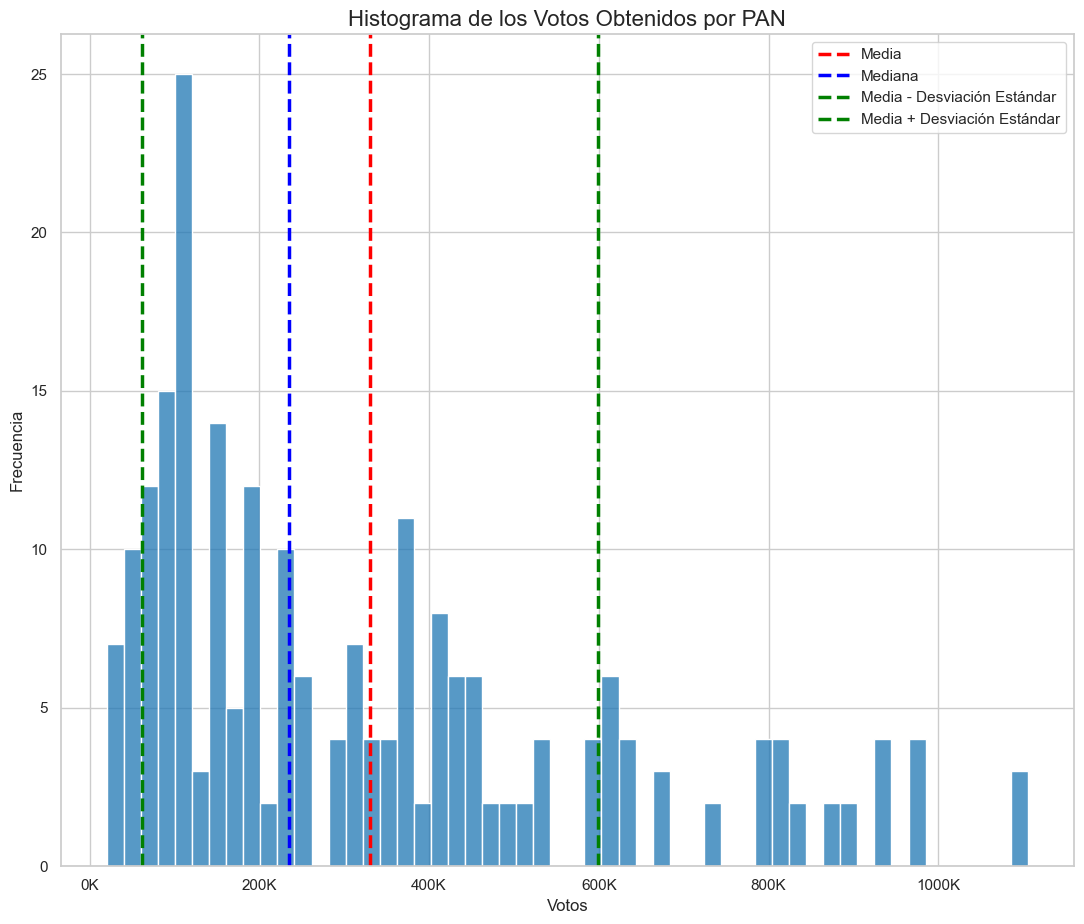

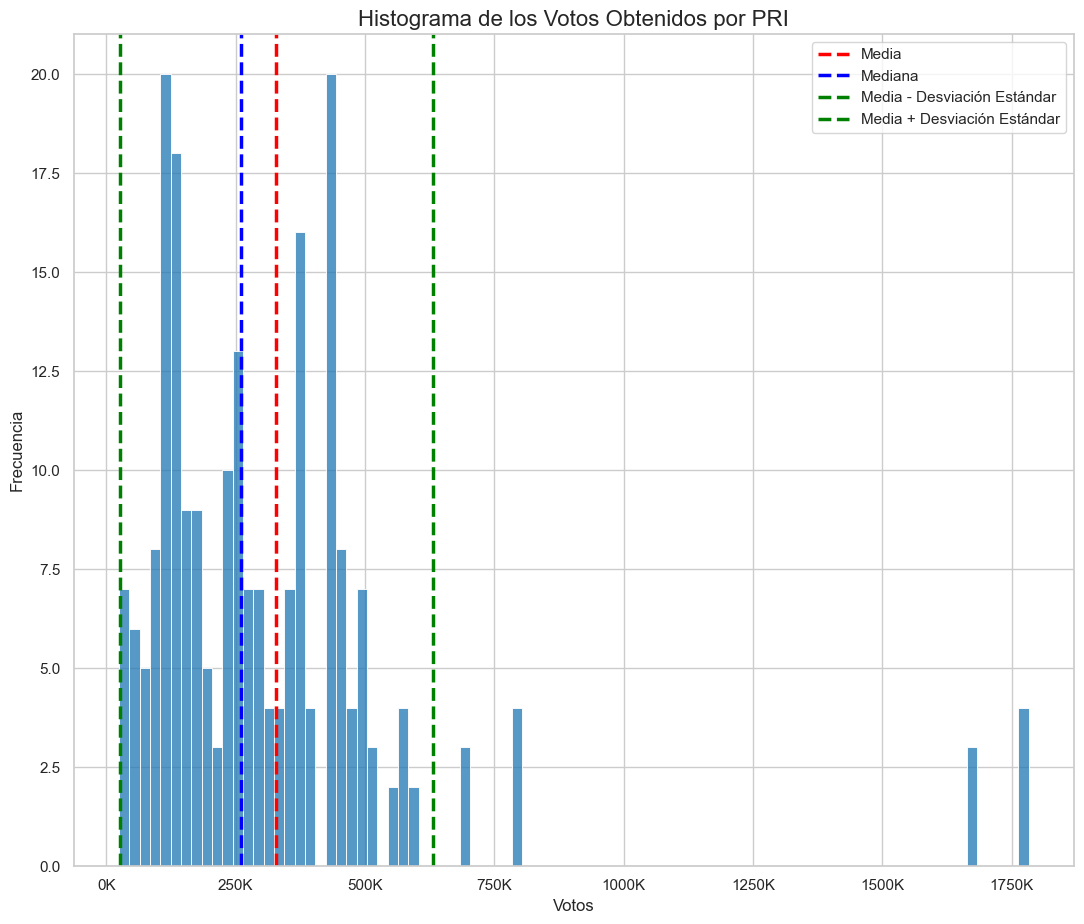

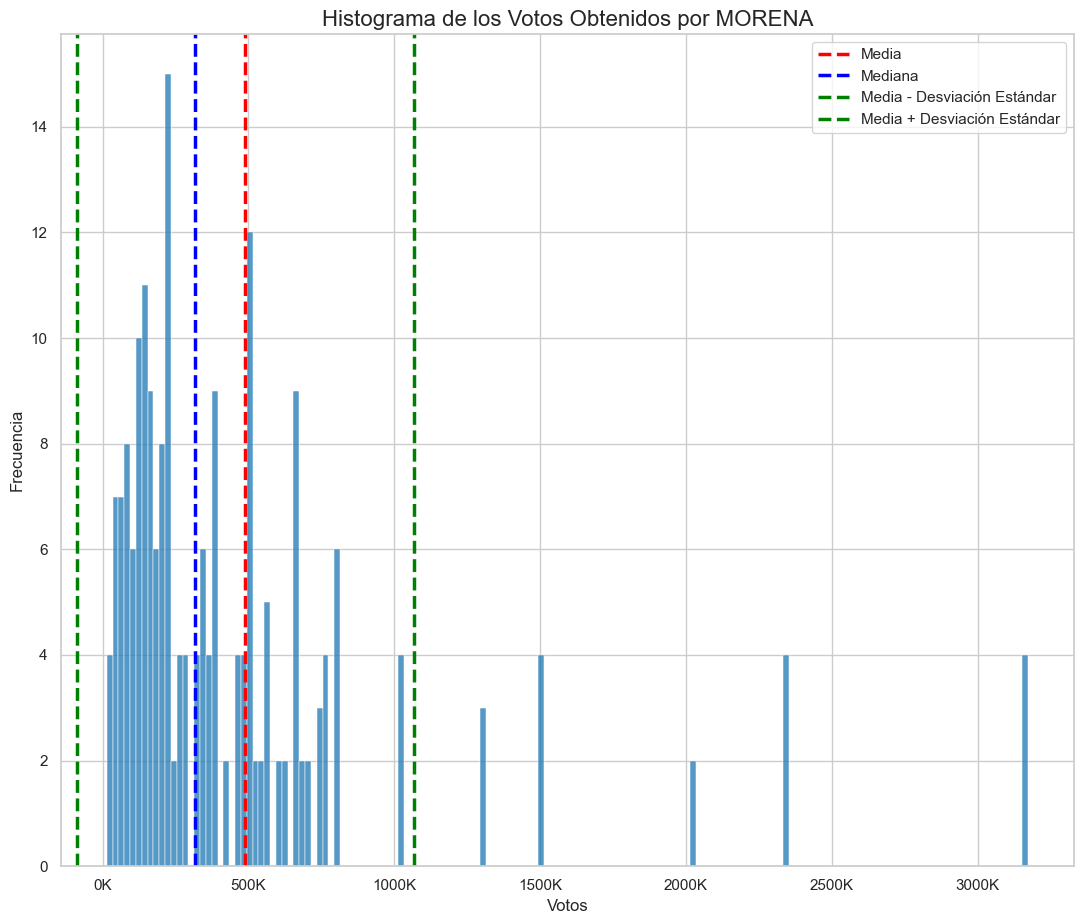

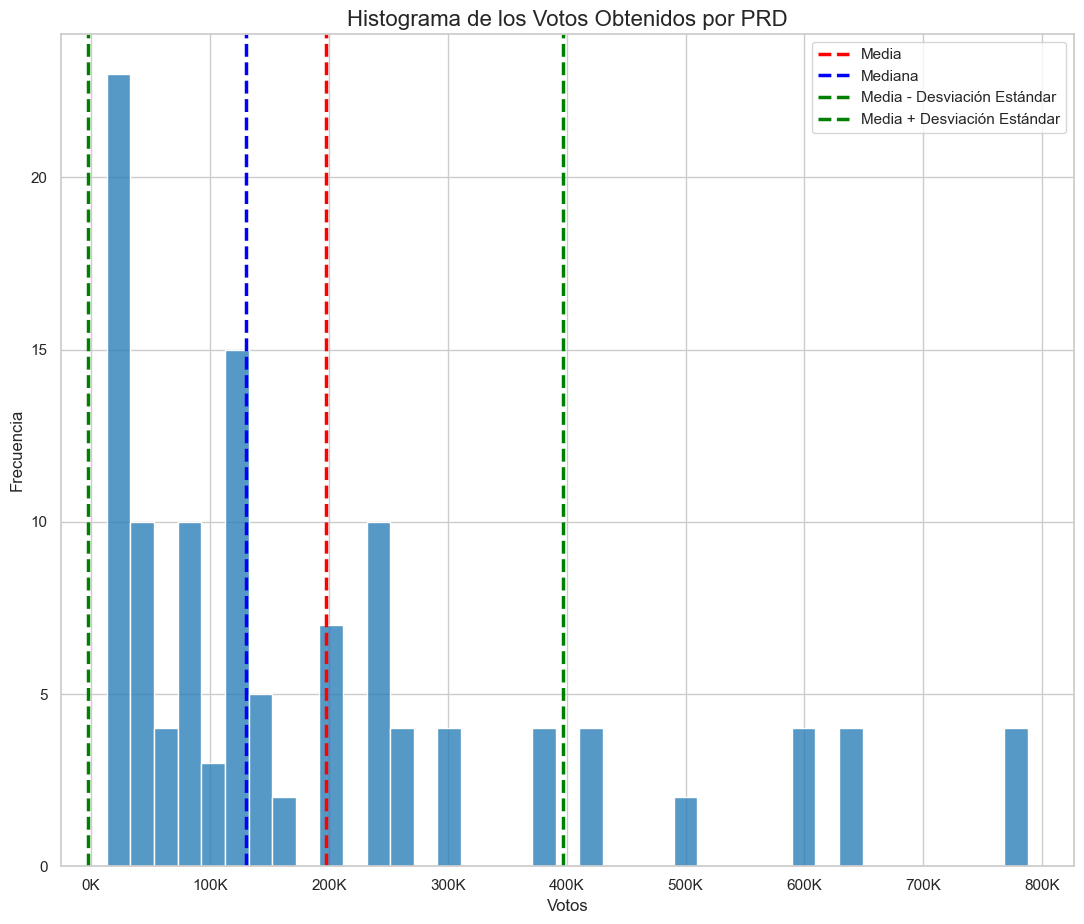

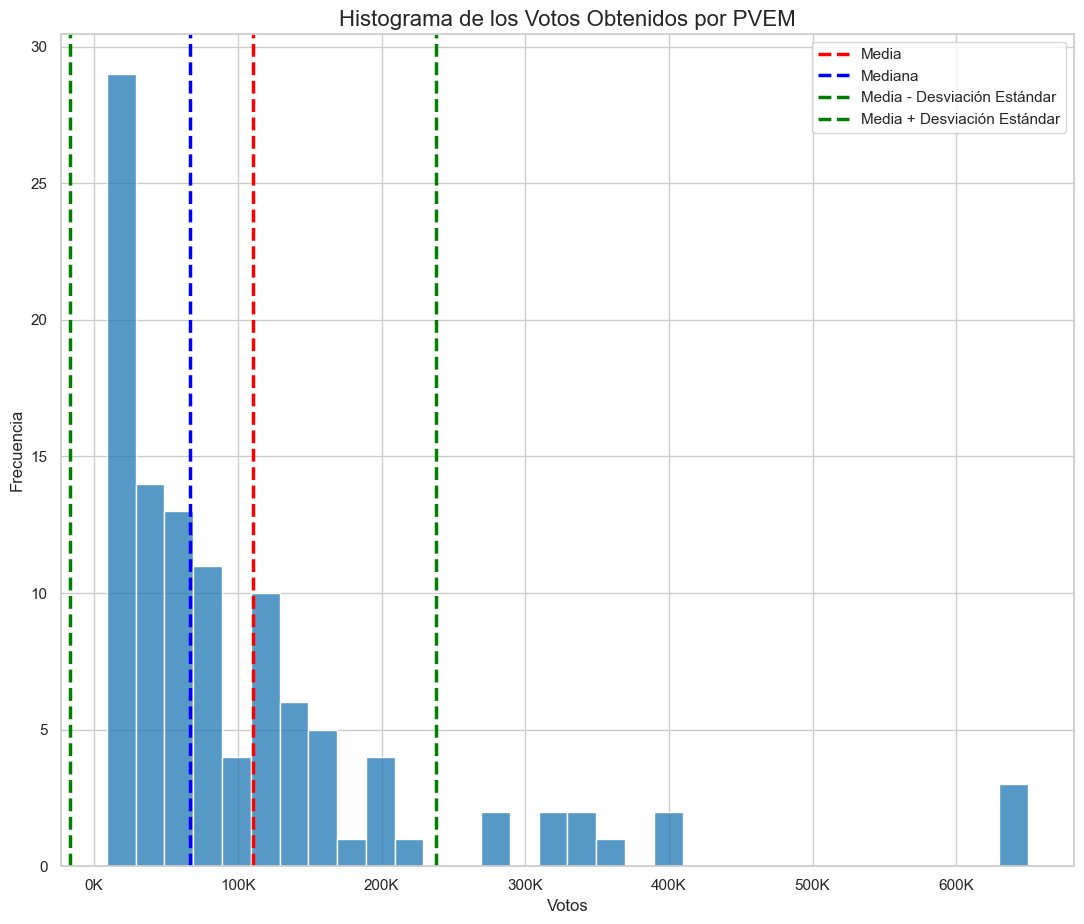

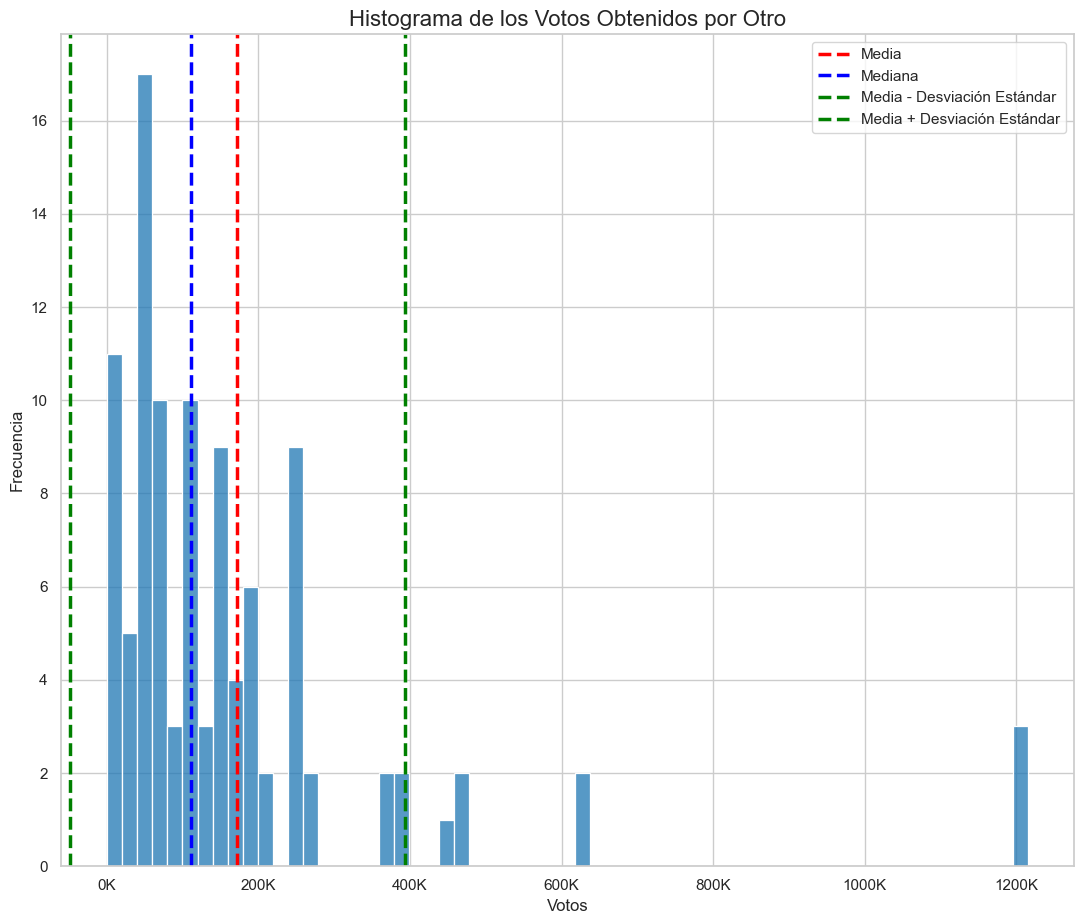

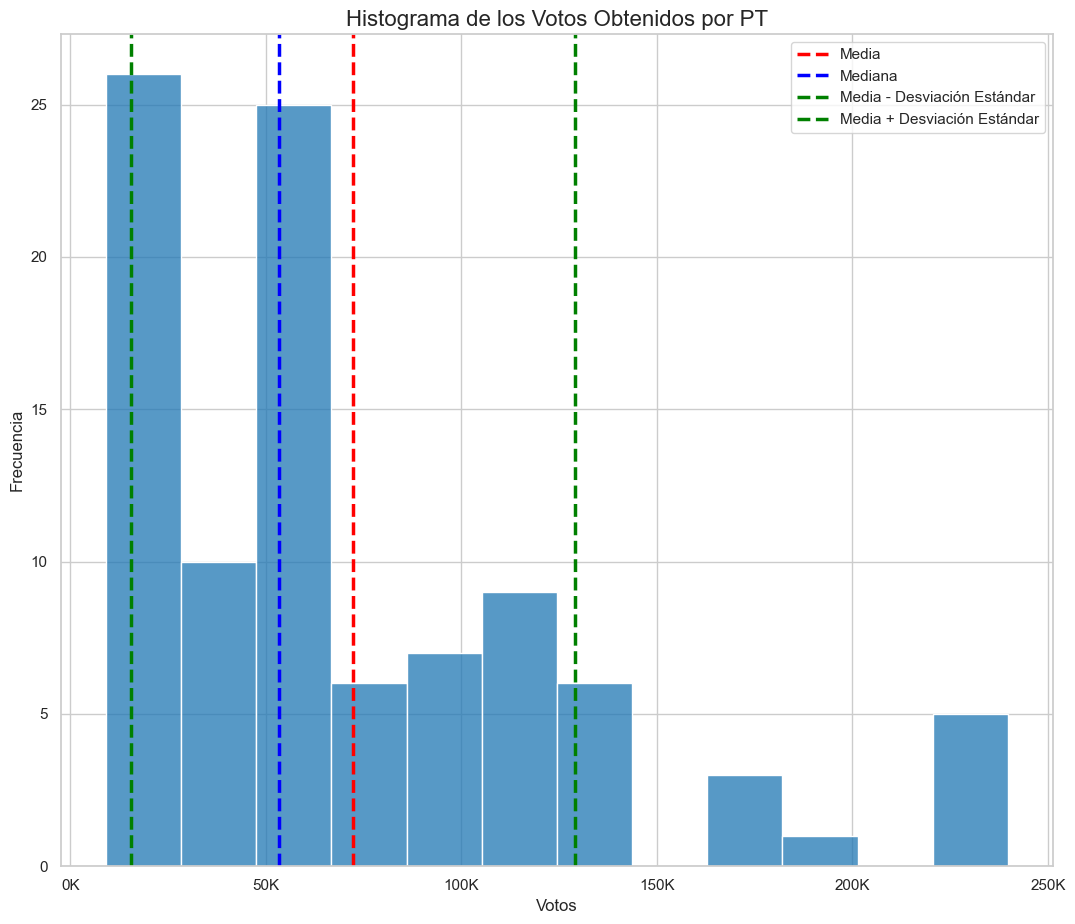

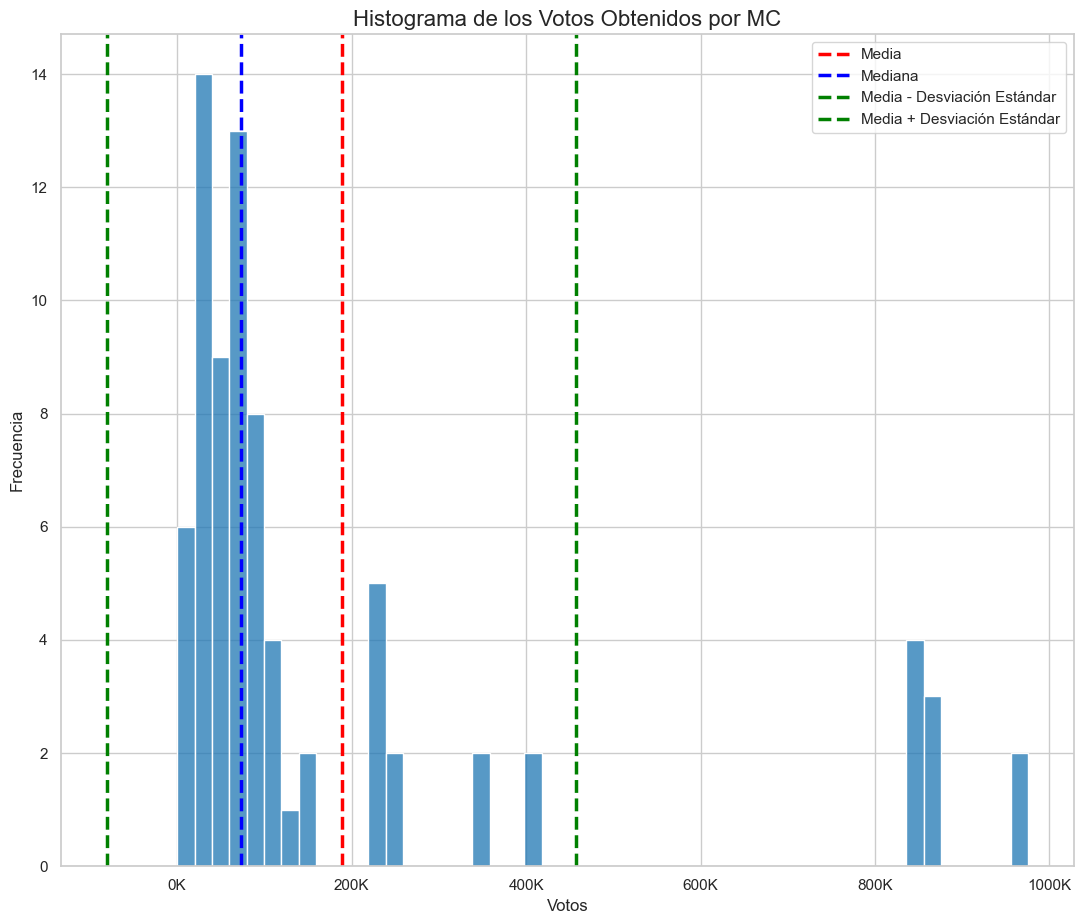

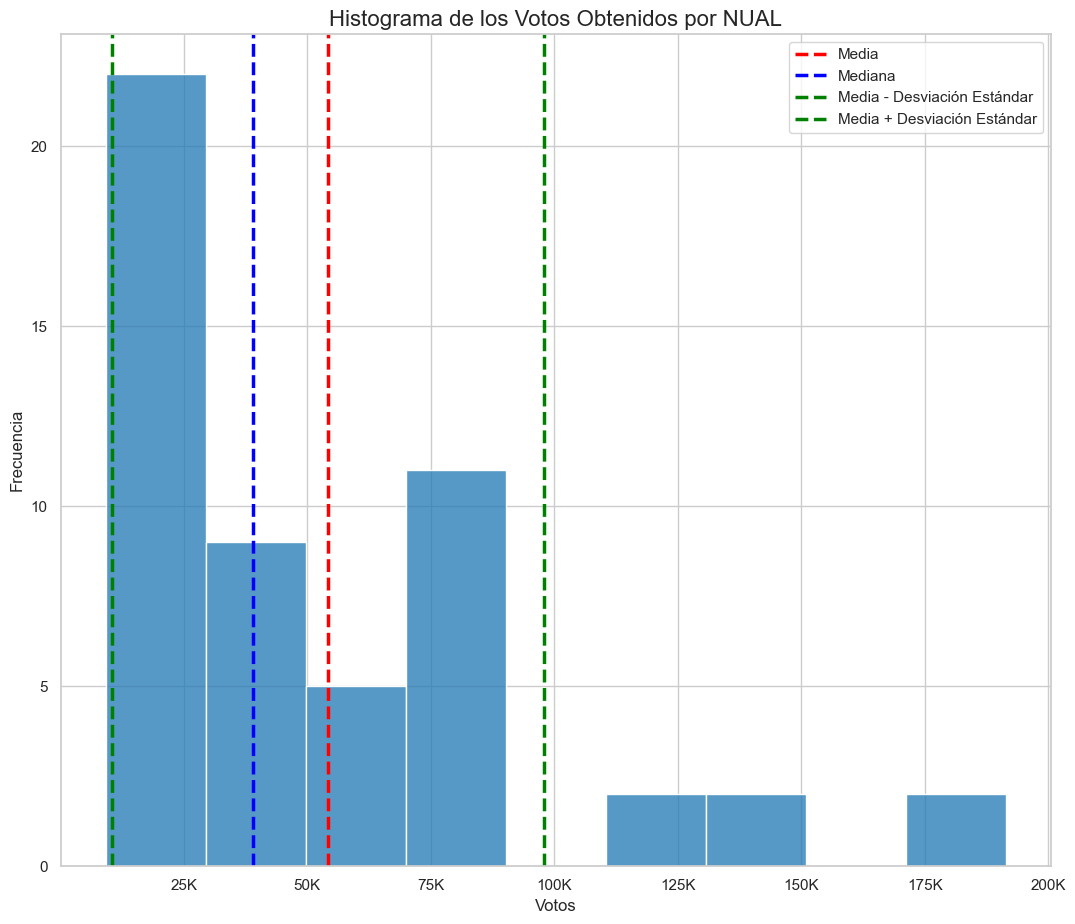

In [117]:
for variable in partidos:
    votos_partido = Elecciones[Elecciones['Partido'] == variable]['Votos']
    
    if not votos_partido.empty and votos_partido.dropna().size > 0:
        sns.histplot(x=votos_partido, binwidth=20000)
        plt.title(f'Histograma de los Votos Obtenidos por {variable}', size=16)
        plt.xlabel('Votos')
        plt.ylabel('Frecuencia')
        plt.tight_layout()

        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))
        
        plt.axvline(
            x=votos_partido.mean(), 
            color='red', 
            linestyle='dashed', 
            linewidth=2.5, 
            label='Media')
        plt.axvline(x=votos_partido.median(), 
                    color='blue', 
                    linestyle='dashed', 
                    linewidth=2.5, 
                    label='Mediana')
        plt.axvline(x=votos_partido.mean() - votos_partido.std(), 
                    color='green', 
                    linestyle='dashed', 
                    linewidth=2.5, 
                    label='Media - Desviación Estándar')
        plt.axvline(x=votos_partido.mean() + votos_partido.std(), 
                    color='green', 
                    linestyle='dashed', 
                    linewidth=2.5, 
                    label='Media + Desviación Estándar')
        
        plt.legend()
        
        plt.show()
    else:
        print(f"No hay datos válidos para el partido: {variable}")

## Boxplot de los Curules Obtenidos por Sexo en México:

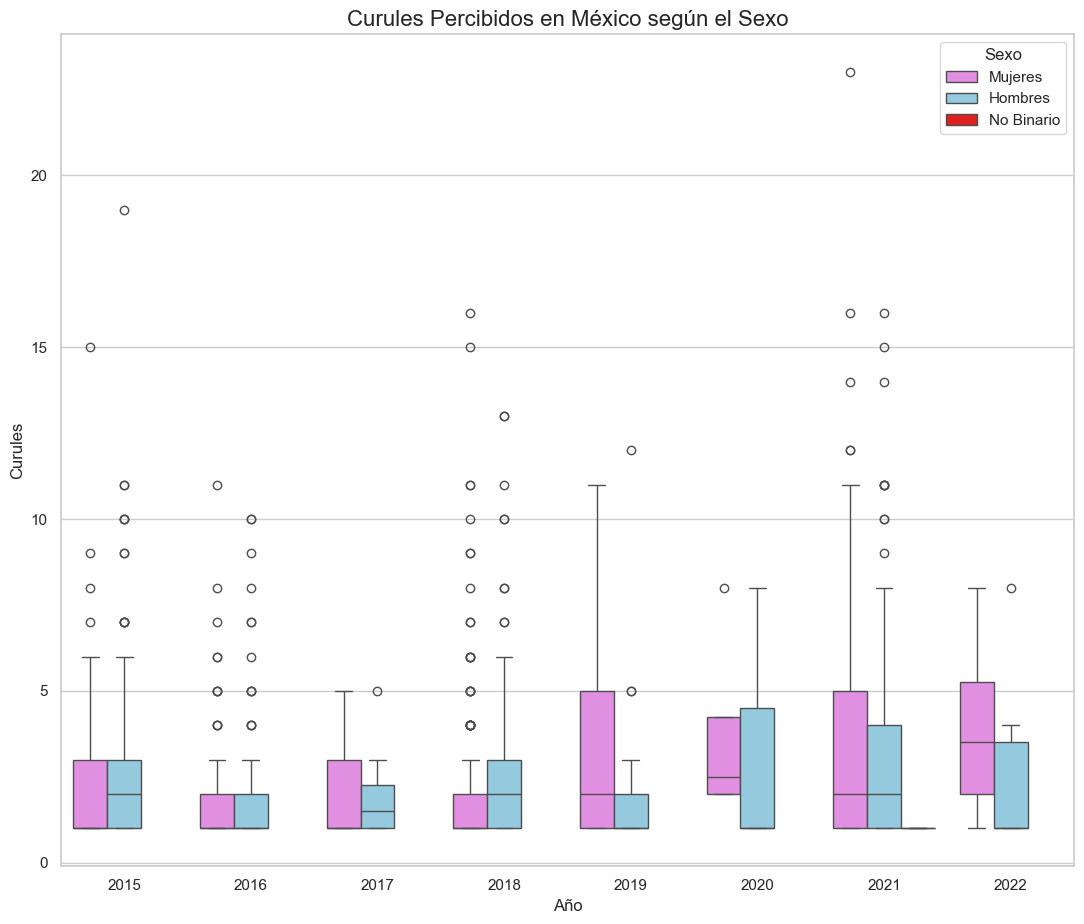

In [46]:
(
    Elecciones
    .pipe(
        lambda df: sns.boxplot(
            data = df,
            x = 'Año',
            y = 'Curules',
            hue = 'Sexo',
            palette = gender_palette
        )
    )
)

plt.title('Curules Percibidos en México según el Sexo', size = 16)
plt.xlabel('Año')
plt.ylabel('Curules')
plt.tight_layout()
plt.show()

## Estadística Descriptiva Aplicada:

### Función de Probabilidad de Masas:

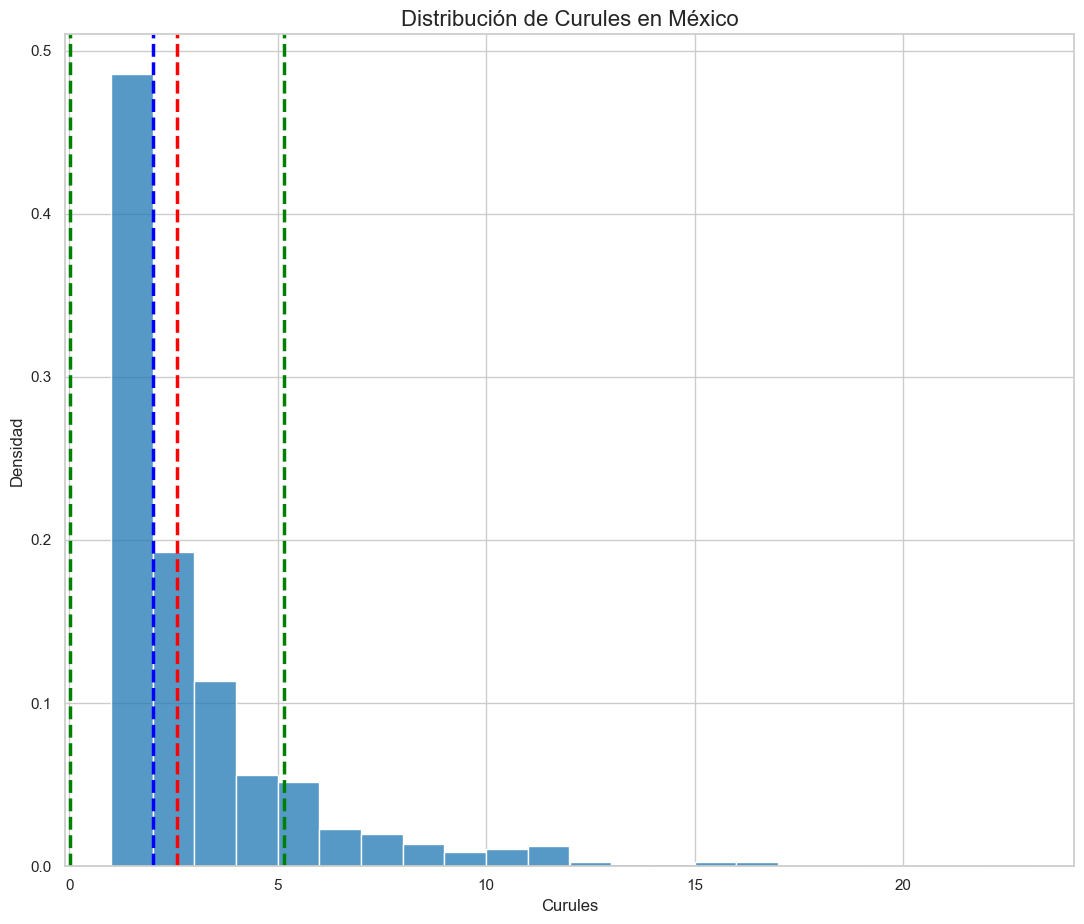

In [47]:
(
    Elecciones
    .pipe(
        lambda df: sns.histplot(
            data = df,
            x = 'Curules',
            bins = 1,
            binwidth= 1,
            stat = 'probability'
        )
    )
)

plt.axvline(
    x = Elecciones.Curules.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Curules.median(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Curules.mean() - Elecciones.Curules.std(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2.5
)
plt.axvline(
    x = Elecciones.Curules.mean() + Elecciones.Curules.std(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2.5
)

plt.title('Distribución de Curules en México', size = 16)
plt.xlabel('Curules')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

### PMFs Utilizando empiricaldist:

In [48]:
pmf_curules = empiricaldist.Pmf.from_seq(
    Elecciones['Curules']
)

pmf_curules

,probs
Curules,
1,0.49
2,0.19
3,0.11
4,0.06
5,0.05
6,0.02
7,0.02
8,0.01
9,0.01


### Creamos un dataframe con los resultados:

In [49]:
pmf_df = pd.DataFrame({'Curules': pmf_curules.index, 'probs': pmf_curules.values})


pmf_df_sorted = pmf_df.sort_values(by='probs', ascending=False)

pmf_df_sorted

,Curules,probs
0,1,0.49
1,2,0.19
2,3,0.11
3,4,0.06
4,5,0.05
5,6,0.02
6,7,0.02
7,8,0.01
10,11,0.01
9,10,0.01


### Graficamos los resultados de PMFs:

#### Gráfica de Barras:

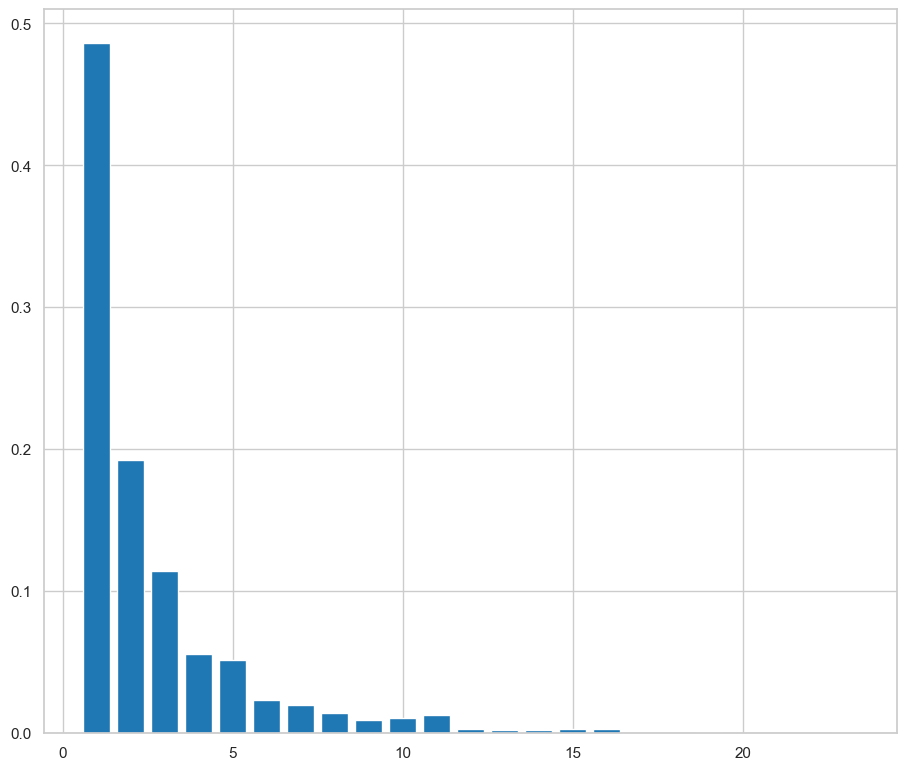

In [50]:
pmf_curules.bar()

#### Histograma:

In [51]:
pmf_curules(7)

# Esta es probabilidad de encontrar en el conjunto de datos un partido político que haya ganado 7 culules

0.019656019656019656

#### Probabilidad de Encontrar Valores Concretos:

In [52]:
pmf_curules(2)

0.19246519246519248

### Funciones Empíricas de Probabilidad Acumuladas (ECDFs):

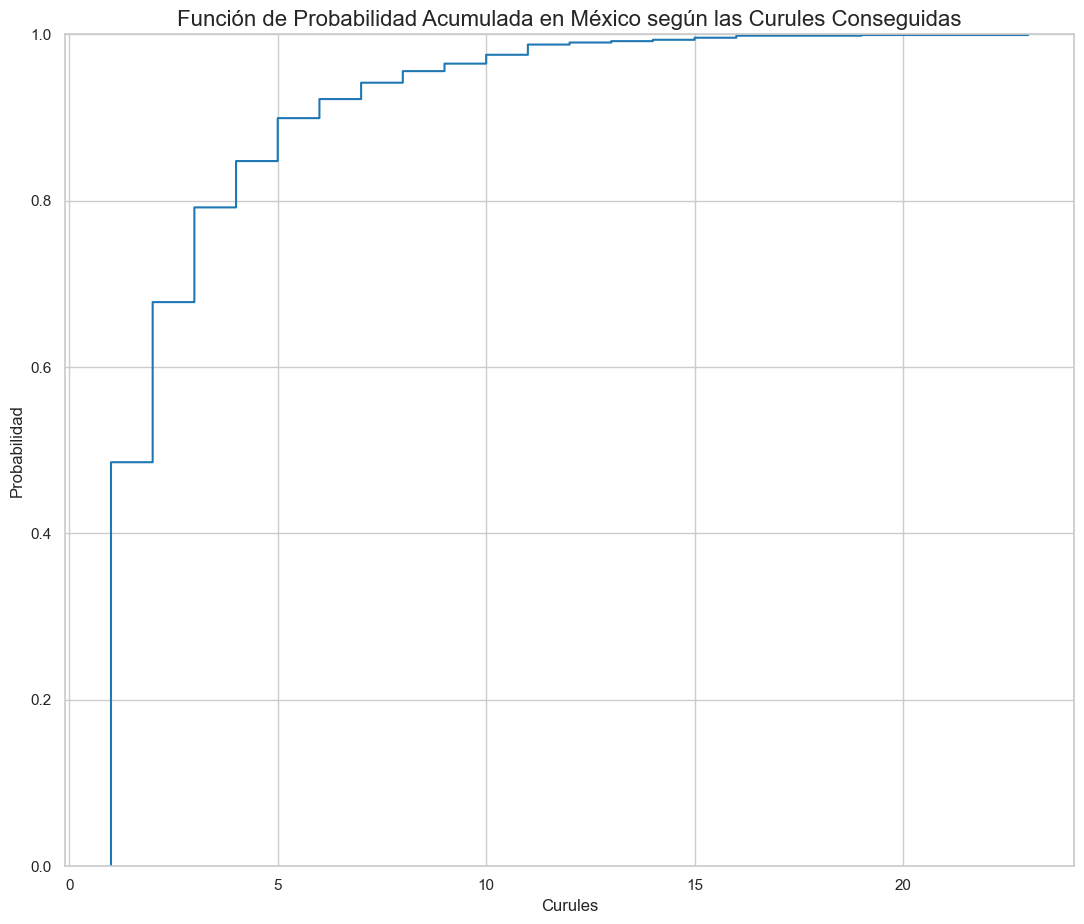

In [53]:
(
    Elecciones
    .pipe(
        lambda df: sns.ecdfplot(
            data = df,
            x = 'Curules'
        )
    )
)

plt.title('Función de Probabilidad Acumulada en México según las Curules Conseguidas', size = 16)
plt.xlabel('Curules')
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

### Aplicamos los ECDFs Utilizando empiricaldist:

In [54]:
cdf_curules = empiricaldist.Cdf.from_seq(
    Elecciones.Curules,
    normalize= True
)

cdf_curules

,probs
Curules,
1,0.49
2,0.68
3,0.79
4,0.85
5,0.90
6,0.92
7,0.94
8,0.96
9,0.96


#### Graficamos el Resultado:

5 0.8992628992628993 ro


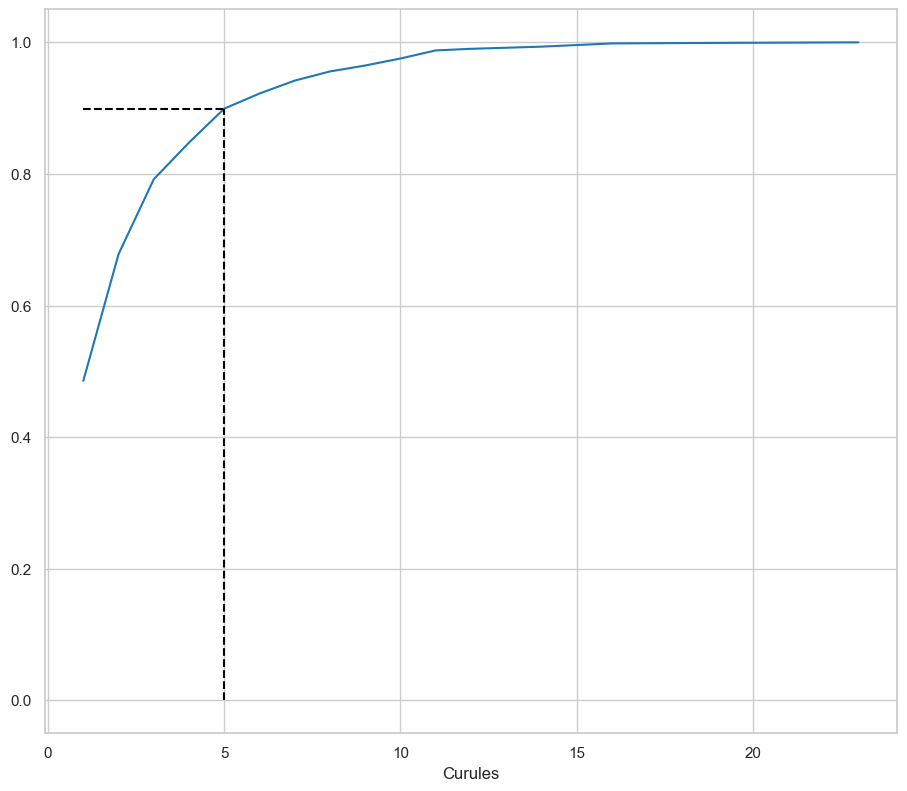

In [55]:
cdf_curules.plot()

q = 5
p = cdf_curules.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=cdf_curules.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

print(q, p, 'ro')

#### Graficamos las Probabilidades de Encontrar un Valor de Curules por Sexo:

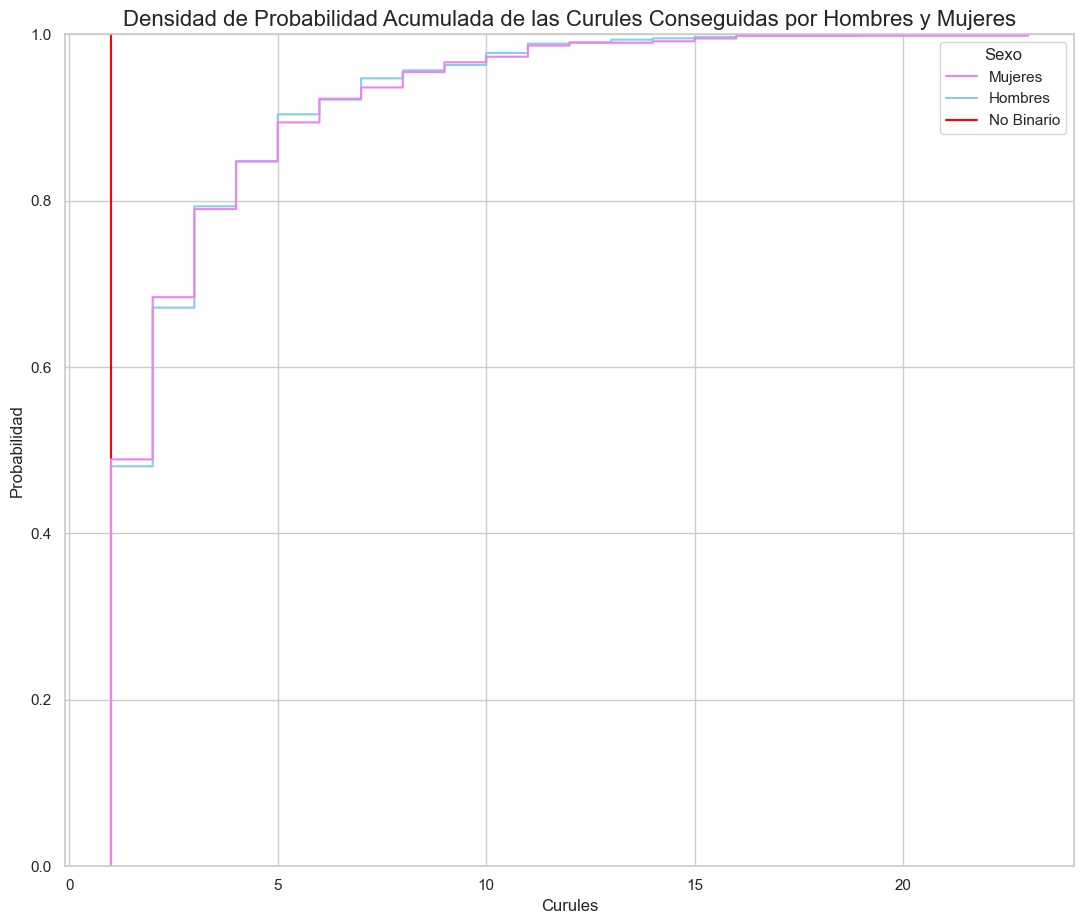

In [56]:
(
    Elecciones
    .pipe(
        lambda df: sns.ecdfplot(
            data = df,
            x = 'Curules',
            hue = 'Sexo',
            palette = gender_palette
        )
    )
)

plt.title('Densidad de Probabilidad Acumulada de las Curules Conseguidas por Hombres y Mujeres', size = 16)
plt.xlabel('Curules')
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

#### Encontramos la Probabilidad de Encontrar Partidos que hayan conseguido en una misma entidad entre 1 y 5 curules:

In [57]:
cdf_curules(5)

array(0.8992629)

### Estadística Descriptiva Aplicada: Función de Densidad de Probabilidad:

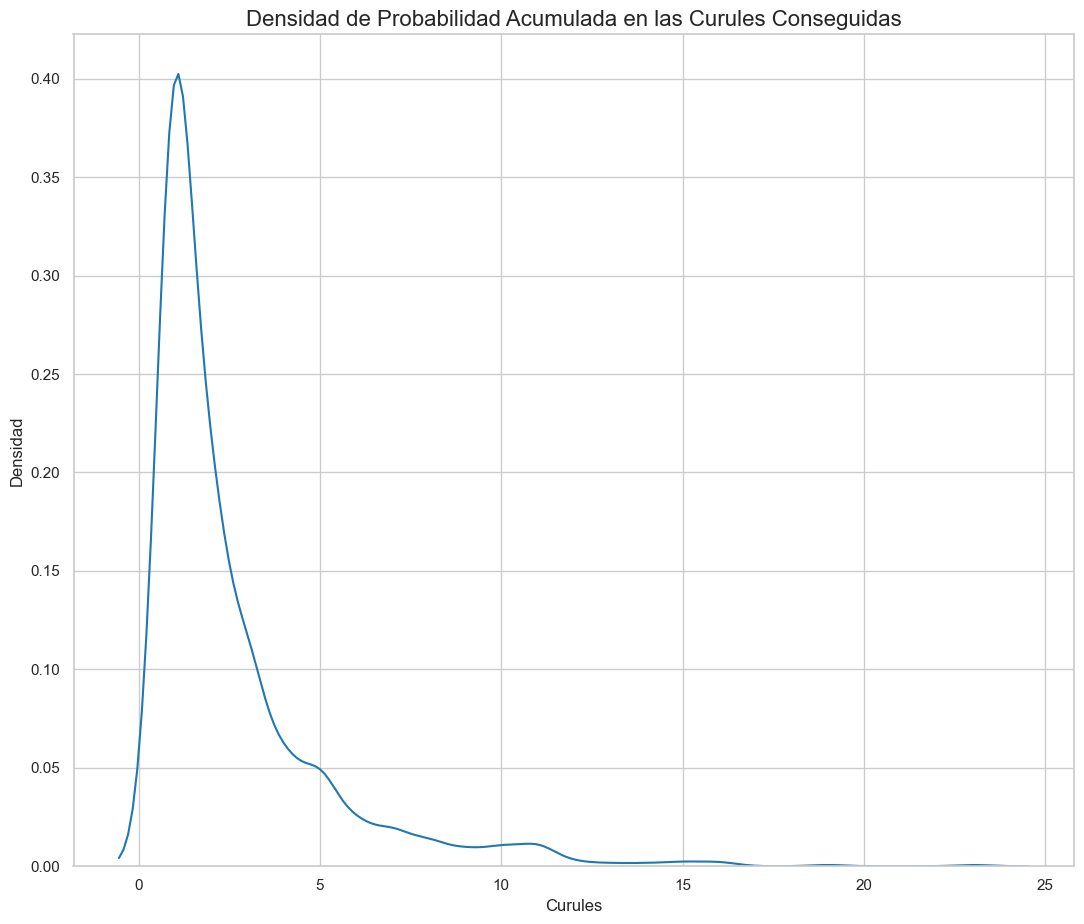

In [59]:
sns.kdeplot(
    data = Elecciones,
    x = 'Curules',
    bw_method= 0.2
)

plt.title('Densidad de Probabilidad Acumulada en las Curules Conseguidas', size = 16)
plt.xlabel('Curules')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

### CDFs: En este Caso Simulamos Partiendo del Supuesto que Contamos con una Distribución Normal:

In [60]:
stats = Elecciones['Curules'].describe()
stats

count   1221.00
mean       2.59
std        2.57
min        1.00
25%        1.00
50%        2.00
75%        3.00
max       23.00
Name: Curules, dtype: float64

In [61]:
xs = np.linspace(stats['min'], stats['max'])
xs

array([ 1.        ,  1.44897959,  1.89795918,  2.34693878,  2.79591837,
        3.24489796,  3.69387755,  4.14285714,  4.59183673,  5.04081633,
        5.48979592,  5.93877551,  6.3877551 ,  6.83673469,  7.28571429,
        7.73469388,  8.18367347,  8.63265306,  9.08163265,  9.53061224,
        9.97959184, 10.42857143, 10.87755102, 11.32653061, 11.7755102 ,
       12.2244898 , 12.67346939, 13.12244898, 13.57142857, 14.02040816,
       14.46938776, 14.91836735, 15.36734694, 15.81632653, 16.26530612,
       16.71428571, 17.16326531, 17.6122449 , 18.06122449, 18.51020408,
       18.95918367, 19.40816327, 19.85714286, 20.30612245, 20.75510204,
       21.20408163, 21.65306122, 22.10204082, 22.55102041, 23.        ])

In [62]:
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
ys

array([0.26845183, 0.32897749, 0.39435937, 0.4628679 , 0.53249869,
       0.6011466 , 0.66679478, 0.72769059, 0.78248313, 0.83030482,
       0.87079014, 0.90403616, 0.93051818, 0.9509794 , 0.96631432,
       0.97746241, 0.98532361, 0.99070068, 0.99426825, 0.99656423,
       0.99799752, 0.99886541, 0.99937517, 0.9996656 , 0.9998261 ,
       0.99991214, 0.99995688, 0.99997944, 0.99999048, 0.99999572,
       0.99999813, 0.99999921, 0.99999967, 0.99999987, 0.99999995,
       0.99999998, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

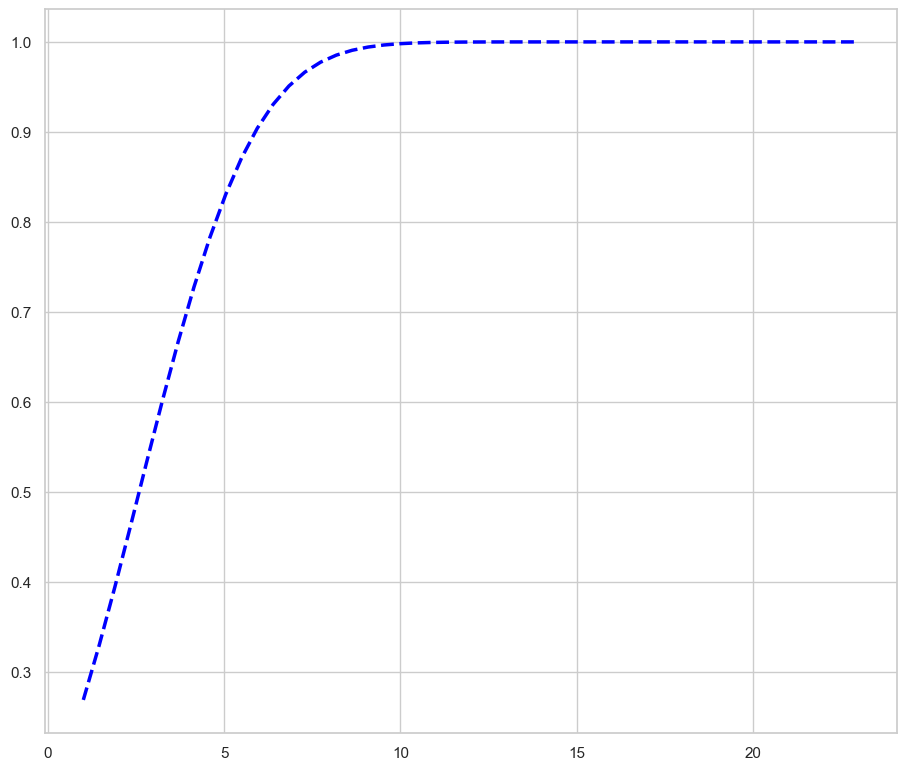

In [63]:
plt.plot(xs, ys, color='blue', linestyle='dashed', linewidth=2.5)

### Aplicamos empiricaldist para Comparar con nuestro Patrón de Datos:

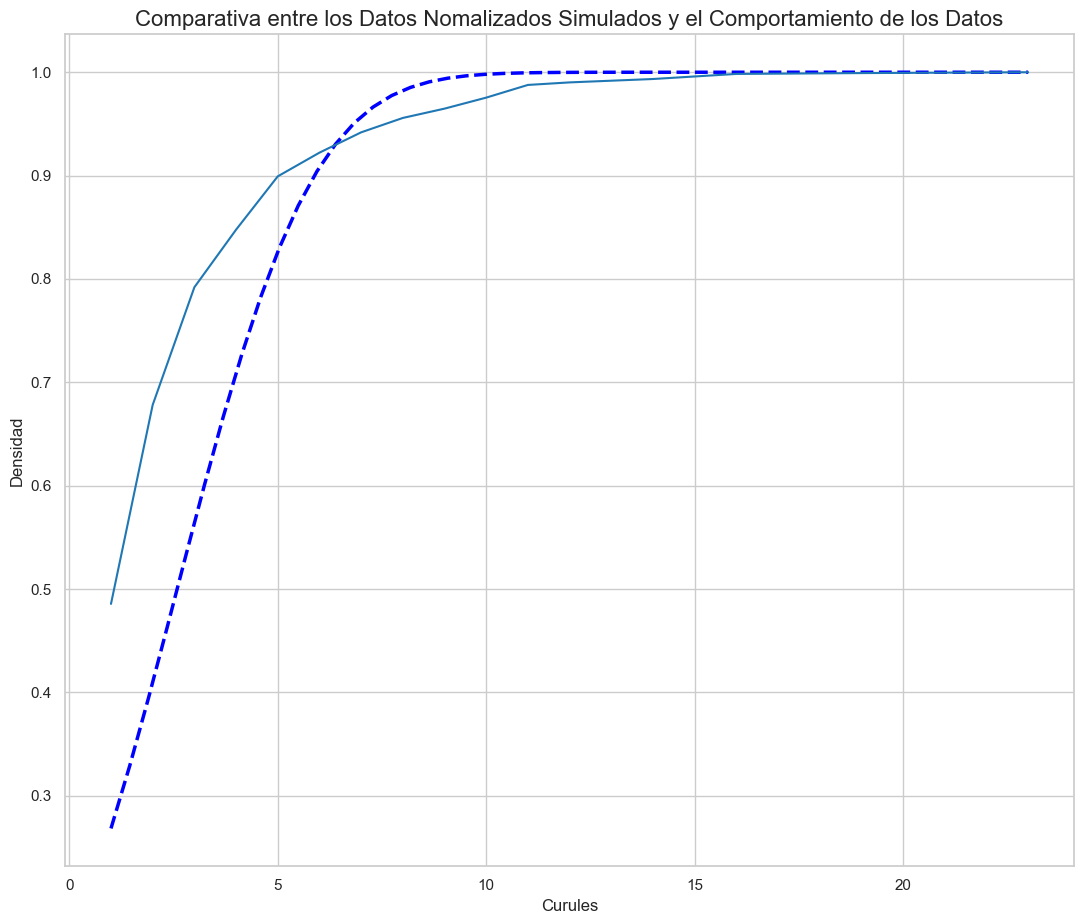

In [64]:
plt.plot(xs, ys, color='blue', linestyle='dashed', linewidth=2.5)

cdf_curules = empiricaldist.Cdf.from_seq(
    Elecciones.Curules,
    normalize= True
).plot()

plt.title('Comparativa entre los Datos Nomalizados Simulados y el Comportamiento de los Datos', size = 16)
plt.xlabel('Curules')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

aquí ya podría pensar que mi conjunto de datos no está normalizado, aunque habría que corroborarlo.

In [65]:
ys1 = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
ys1

array([1.28331816e-01, 1.40789370e-01, 1.49810077e-01, 1.54613649e-01,
       1.54771244e-01, 1.50268639e-01, 1.41508352e-01, 1.29250262e-01,
       1.14502885e-01, 9.83868522e-02, 8.19961274e-02, 6.62804207e-02,
       5.19652247e-02, 3.95162753e-02, 2.91457231e-02, 2.08501558e-02,
       1.44670311e-02, 9.73610308e-03, 6.35516091e-03, 4.02349604e-03,
       2.47067854e-03, 1.47151451e-03, 8.50057869e-04, 4.76286284e-04,
       2.58835175e-04, 1.36431344e-04, 6.97494290e-05, 3.45861958e-05,
       1.66341485e-05, 7.75950451e-06, 3.51077539e-06, 1.54066331e-06,
       6.55764760e-07, 2.70722310e-07, 1.08401592e-07, 4.21000789e-08,
       1.58586348e-08, 5.79407788e-09, 2.05323423e-09, 7.05713301e-10,
       2.35263064e-10, 7.60702482e-11, 2.38567652e-11, 7.25677938e-12,
       2.14097660e-12, 6.12654408e-13, 1.70041467e-13, 4.57751484e-14,
       1.19519927e-14, 3.02681945e-15])

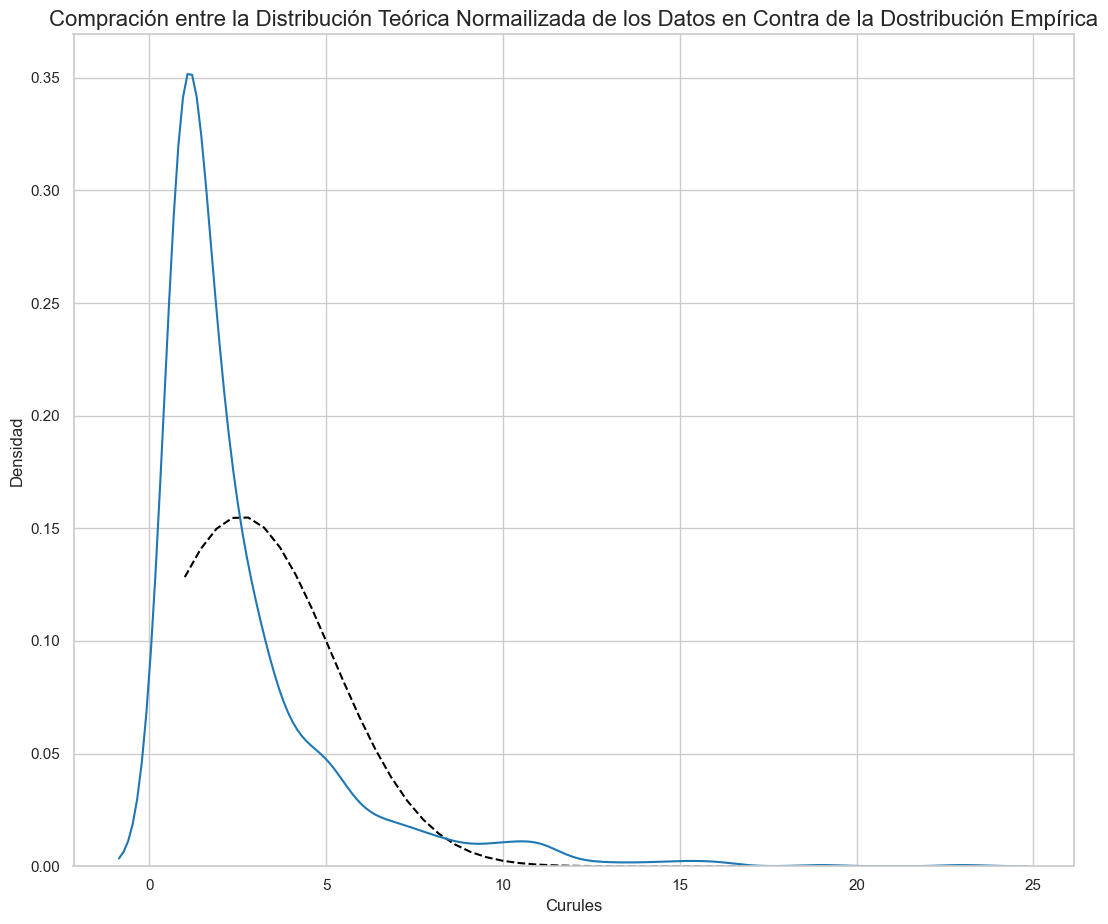

In [66]:
plt.plot(xs, ys1, color='black', linestyle='dashed')
sns.kdeplot(
    data = Elecciones,
    x='Curules'
)
plt.title('Compración entre la Distribución Teórica Normailizada de los Datos en Contra de la Dostribución Empírica', size = 16)
plt.xlabel('Curules')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

## Teoría del Límite Central:

Para Aplicar la teoría del límite central para conocer la Probabilidad de Encontrar una Mujer u Hombre legislador en el conjunto de datos es menester expandir el conjunto de datos:

### Expandimos el Conjunto de Datos:

In [67]:
print(Elecciones.shape)

(1221, 14)


In [68]:
expanded_elecciones = Elecciones.loc[Elecciones.index.repeat(Elecciones['Curules'])].reset_index(drop=True)
expanded_elecciones.head(20)

,Año,ID_ESTADO,NOMBRE_ESTADO,Partido,Votos,Votos1,Proporcion,Sexo,Curules,Zona,Espectro,Presidencia,PARTICIPACION,Sufragios
0,2015,3,BAJA CALIFORNIA SUR,MORENA,14321.00,224732,6.37,Mujeres,1,Norte,Izquierda Indefinida,No,0.56,Alto
1,2015,3,BAJA CALIFORNIA SUR,Otro,54524.00,224732,24.26,Hombres,1,Norte,Movimiento Alterno,No,0.56,Alto
2,2015,3,BAJA CALIFORNIA SUR,Otro,54524.00,224732,24.26,Mujeres,1,Norte,Movimiento Alterno,No,0.56,Alto
3,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Hombres,7,Norte,Derecha Extravagante,No,0.56,Alto
4,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Hombres,7,Norte,Derecha Extravagante,No,0.56,Alto
5,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Hombres,7,Norte,Derecha Extravagante,No,0.56,Alto
6,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Hombres,7,Norte,Derecha Extravagante,No,0.56,Alto
7,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Hombres,7,Norte,Derecha Extravagante,No,0.56,Alto
8,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Hombres,7,Norte,Derecha Extravagante,No,0.56,Alto
9,2015,3,BAJA CALIFORNIA SUR,PAN,52564.00,224732,23.39,Hombres,7,Norte,Derecha Extravagante,No,0.56,Alto


In [69]:
print(expanded_elecciones.shape)

(3158, 14)


### Reemplazamos los valores en Sexo:

In [70]:
Processed_sex = expanded_elecciones.Sexo.replace(["Hombres", "Mujeres", "No Binario"], [1, 0, 0])
Processed_sex.value_counts()

Sexo
1    1608
0    1550
Name: count, dtype: int64

### Conocemos las Proporciones dentro del Conjunto de Datos:

In [71]:
expanded_elecciones['Sexo'].value_counts(normalize= True)

Sexo
Hombres      0.51
Mujeres      0.49
No Binario   0.00
Name: proportion, dtype: float64

### Generamos el Código de la Teoría del Límite Central:

In [ ]:
number_samples = 1000 #generamos 1000 muestras
sample_size = 35 # tomamos para cada una, 35 Hombres

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1 + number_samples + 1):
    sex_numeric_sample = Processed_sex.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"La población media de Hombres Legisladores es {male_population_mean * 100:.4f}%")

La población media de Hombres Legisladores es 50.9866%


In [73]:
print(f"La población media de Hombres Legisladores es {male_population_mean * 100:.4f}%")

La población media de Hombres Legisladores es 50.9866%


Text(0.5, 1.0, 'Probabilidad de Encontrar un Hombre Legislador en México')

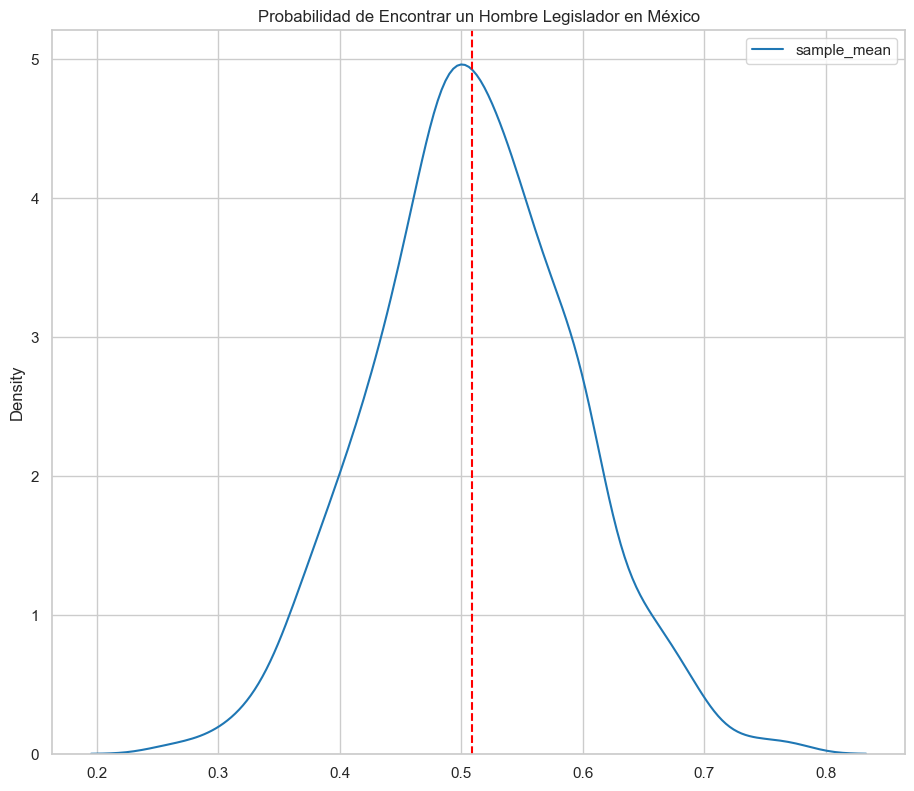

In [74]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial, color = 'yellow')
plt.axvline(x=Processed_sex.mean(), color='red', linestyle='dashed', linewidth=1.5)
plt.title('Probabilidad de Encontrar un Hombre Legislador en México')

### Aplicamos el Ejemplo, ahora con los Partidos políticos, en concreto con Morena:

#### Reempazamos los Valores de Partido:

In [75]:
Elecciones['Partido'].unique()

array(['MORENA', 'Otro', 'PAN', 'PRD', 'PRI', 'PT', 'NUAL', 'PVEM', 'MC',
       'PES'], dtype=object)

In [76]:
Processed_partido = expanded_elecciones.Partido.replace(["MORENA", "Otro", "PAN", "PRD", "PRI", "PT", "NUAL", "PVEM", "MC", "PES"], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Processed_partido.value_counts()

Partido
0    2299
1     859
Name: count, dtype: int64

In [77]:
Processed_partido.value_counts(normalize=True)

Partido
0   0.73
1   0.27
Name: proportion, dtype: float64

In [78]:
number_samples = 1000 #generamos 1000 muestras
sample_size = 35 # tomamos para cada una, 35 legisladores

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1 + number_samples + 1):
    partido_numeric_sample = Processed_partido.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = partido_numeric_sample

morena_population_mean = samples_df.mean().mean()
print(f"La población media de Legisladores morenistas es {morena_population_mean * 100:.4f}%")

La población media de Legisladores morenistas es 27.5449%


In [79]:
print(f"La población media de Legisladores morenistas es {morena_population_mean * 100:.4f}%")

La población media de Legisladores morenistas es 27.5449%


Text(0.5, 1.0, 'Probabilidad de Encontrar un Legislador Morenista en México')

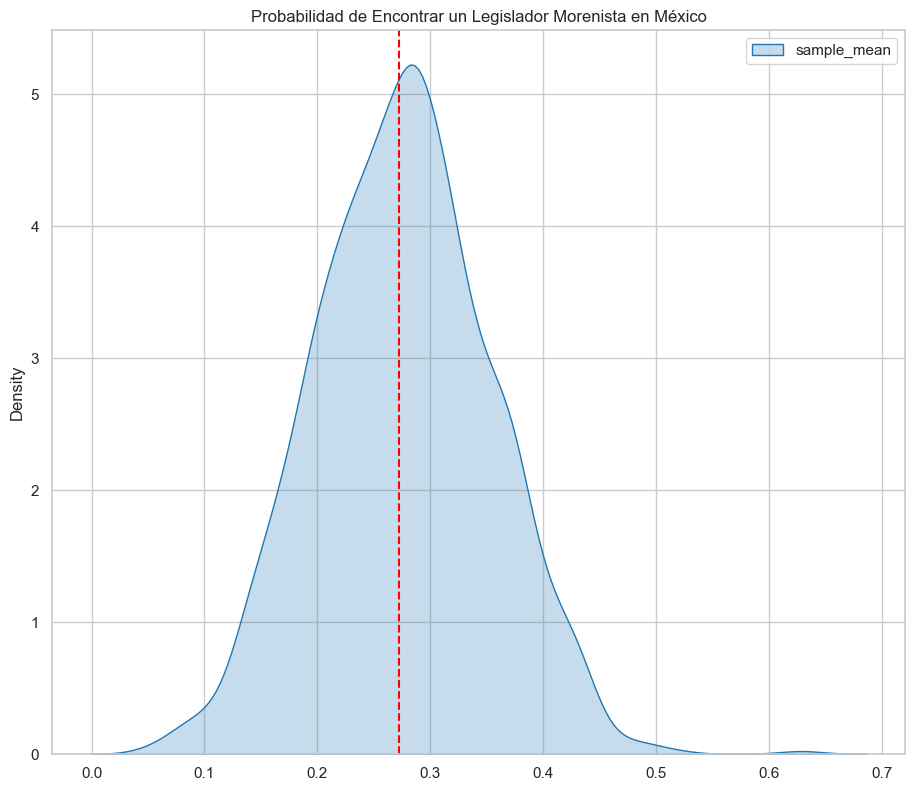

In [80]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial, color = 'yellow', fill = True)
plt.axvline(x=Processed_partido.mean(), color='red', linestyle='dashed', linewidth=1.5)
plt.title('Probabilidad de Encontrar un Legislador Morenista en México')

In [81]:
Elecciones.columns

Index(['Año', 'ID_ESTADO', 'NOMBRE_ESTADO', 'Partido', 'Votos', 'Votos1',
       'Proporcion', 'Sexo', 'Curules', 'Zona', 'Espectro', 'Presidencia',
       'PARTICIPACION', 'Sufragios'],
      dtype='object')

In [82]:
Elecciones.shape

(1221, 14)

In [83]:
expanded_elecciones[['Curules', 'Partido', 'Año', 'ID_ESTADO', 'Sexo']].drop_duplicates()

,Curules,Partido,Año,ID_ESTADO,Sexo
0,1,MORENA,2015,3,Mujeres
1,1,Otro,2015,3,Hombres
2,1,Otro,2015,3,Mujeres
3,7,PAN,2015,3,Hombres
10,6,PAN,2015,3,Mujeres
...,...,...,...,...,...
3144,4,Otro,2022,23,Mujeres
3148,1,PT,2022,23,Hombres
3149,1,PT,2022,23,Mujeres
3150,3,PVEM,2022,23,Hombres


## Visualización del conjunto de datos y la muestra:

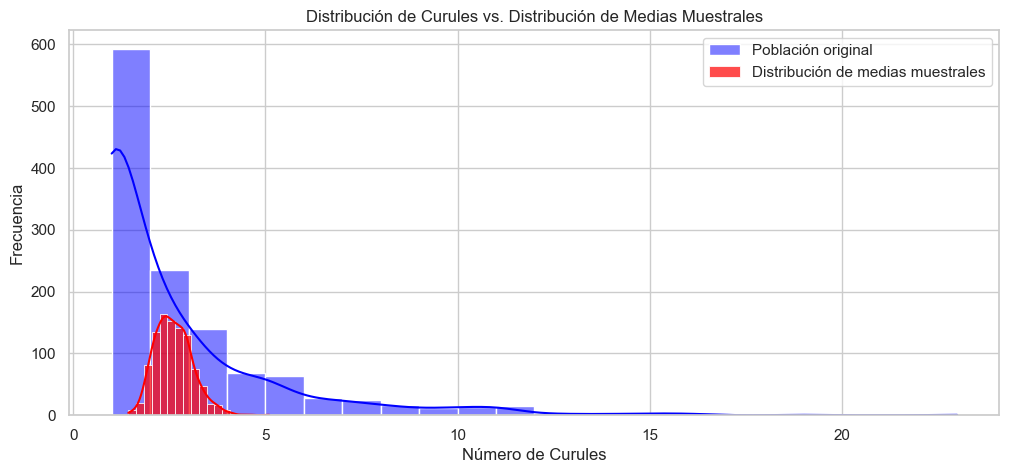

In [ ]:
poblacion = Elecciones

curules_poblacion = poblacion['Curules'].values

np.random.seed(42)  # Para reproducibilidad
medias_muestras = [np.mean(np.random.choice(curules_poblacion, size=30)) for _ in range(1000)]

plt.figure(figsize=(12, 5))
sns.histplot(curules_poblacion, binwidth=1, color="blue", alpha=0.5, label="Población original", kde=True)
sns.histplot(medias_muestras, binwidth=0.2, color="red", alpha=0.7, label="Distribución de medias muestrales", kde=True)

plt.legend()
plt.xlabel("Número de Curules")
plt.ylabel("Frecuencia")
plt.title("Distribución de Curules vs. Distribución de Medias Muestrales")
plt.show()



En este caso, de un conjunto de datos cuyo patrón es exponencial, por la TLC obtuvimos una muestra normalizad y con esta la probabilidad de encontrar legisladores en México.

## Gráfica de Puntos entre los Votos de los Partidos Políticos y la Participación Electoral:

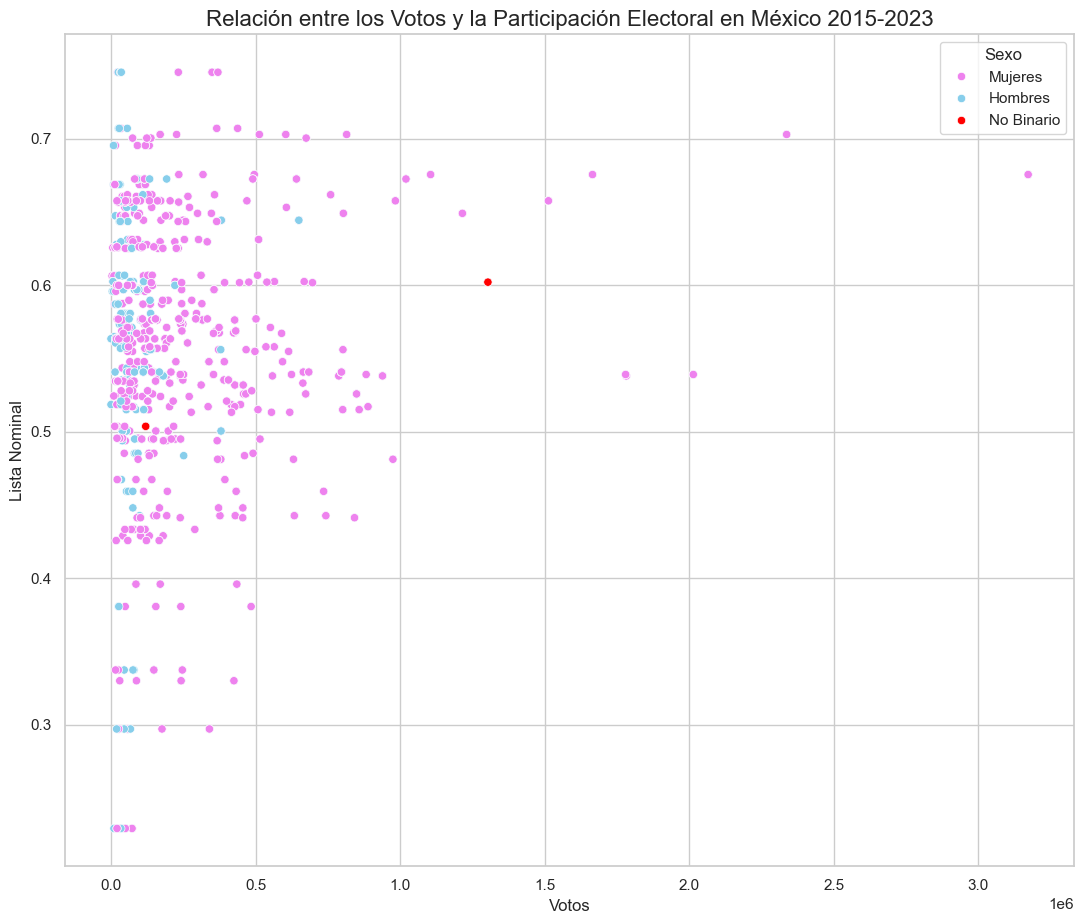

In [85]:
sns.scatterplot(
    data = Elecciones,
    x = 'Votos',
    y = 'PARTICIPACION',
    hue = 'Sexo',
    palette = gender_palette
)

plt.title('Relación entre los Votos y la Participación Electoral en México 2015-2023', size = 16)
plt.xlabel('Votos')
plt.ylabel('Lista Nominal')
plt.tight_layout()
plt.show()

In [86]:
men = Elecciones[Elecciones['Sexo'] == "Hombres"]
men.shape

(624, 14)

In [87]:
women = Elecciones[Elecciones['Sexo'] == "Mujeres"]
women.shape

(595, 14)

## Graficamos el Jointplot:

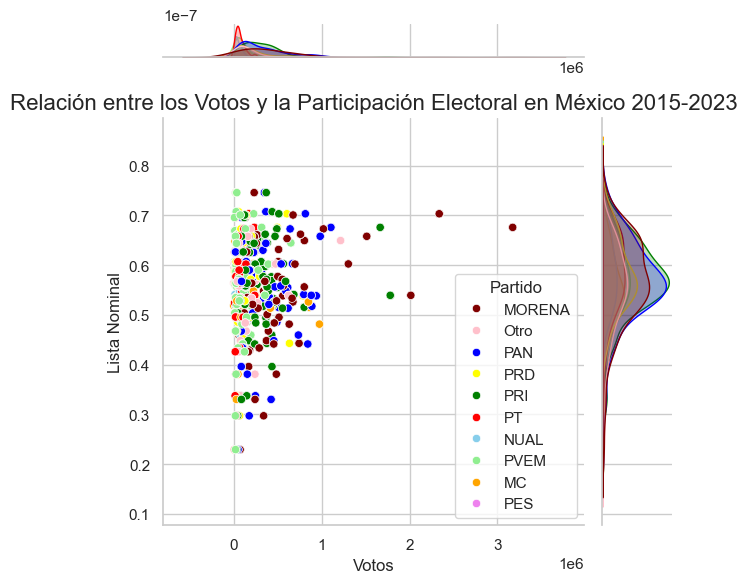

In [88]:
sns.jointplot(
    data = Elecciones,
    x = 'Votos',
    y = 'PARTICIPACION',
    hue = 'Partido',
    palette = partido_palette
)

plt.title('Relación entre los Votos y la Participación Electoral en México 2015-2023', size = 16)
plt.xlabel('Votos')
plt.ylabel('Lista Nominal')
plt.tight_layout()
plt.show()

## Boxplot de los Votos Conseguidos por los Partidos Políticos:

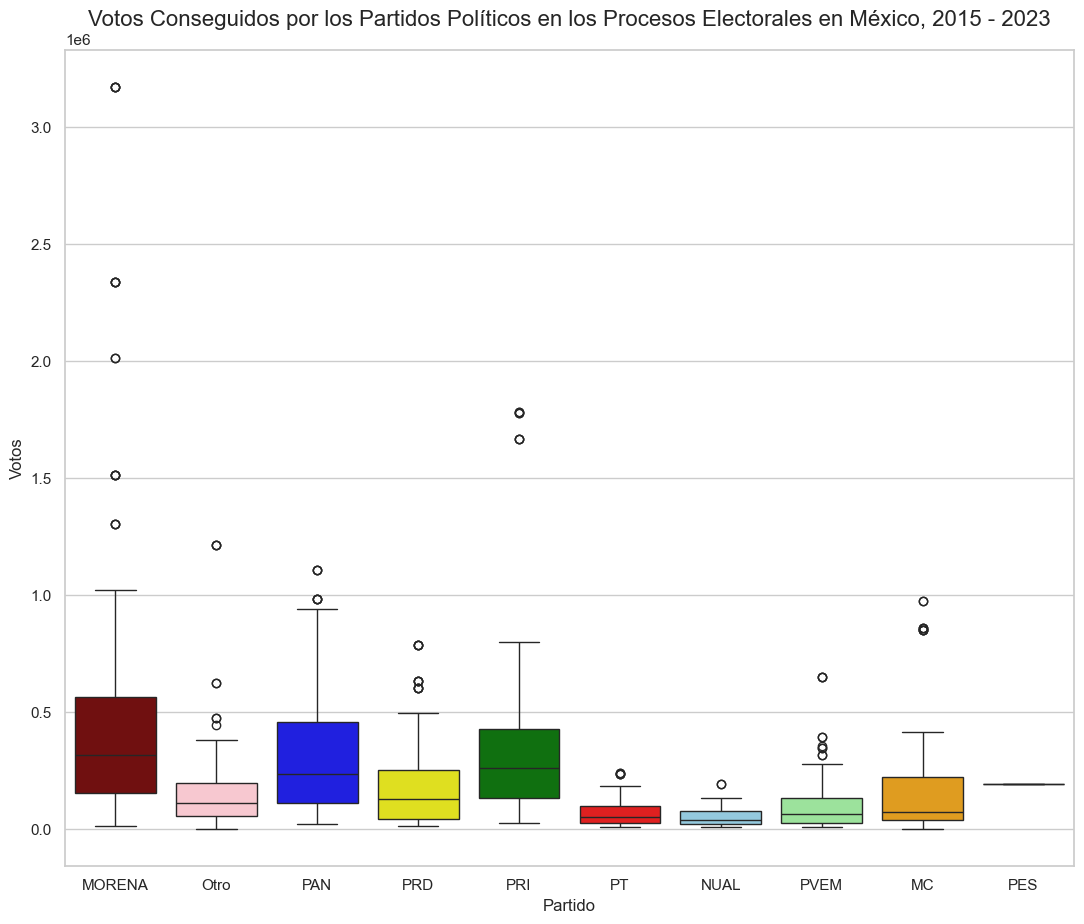

In [89]:
sns.boxplot(
    data = Elecciones,
    x = 'Partido',
    y = 'Votos',
    palette = partido_palette
)

plt.title('Votos Conseguidos por los Partidos Políticos en los Procesos Electorales en México, 2015 - 2023',
          size = 16)
plt.xlabel('Partido')
plt.ylabel('Votos')
plt.tight_layout()
plt.show()

## Boxplot de los Votos Conseguidos por los Partidos Políticos, según el Sexo:

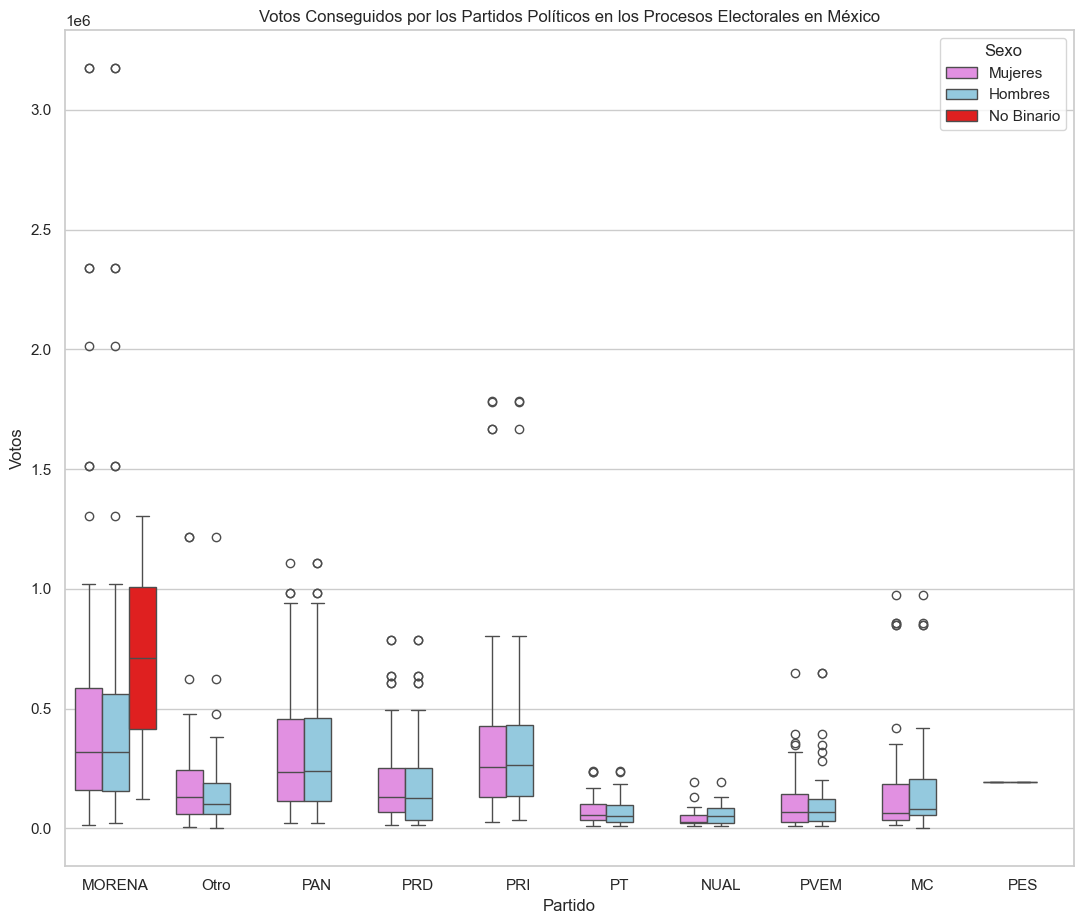

In [90]:
sns.boxplot(
    data = Elecciones,
    x = 'Partido',
    y = 'Votos',
    hue = 'Sexo',
    palette = gender_palette
)

plt.title('Votos Conseguidos por los Partidos Políticos en los Procesos Electorales en México')
plt.xlabel('Partido')
plt.ylabel('Votos')
plt.tight_layout()
plt.show()

## Violinplot de los Votos Conseguidos por los Partidos:

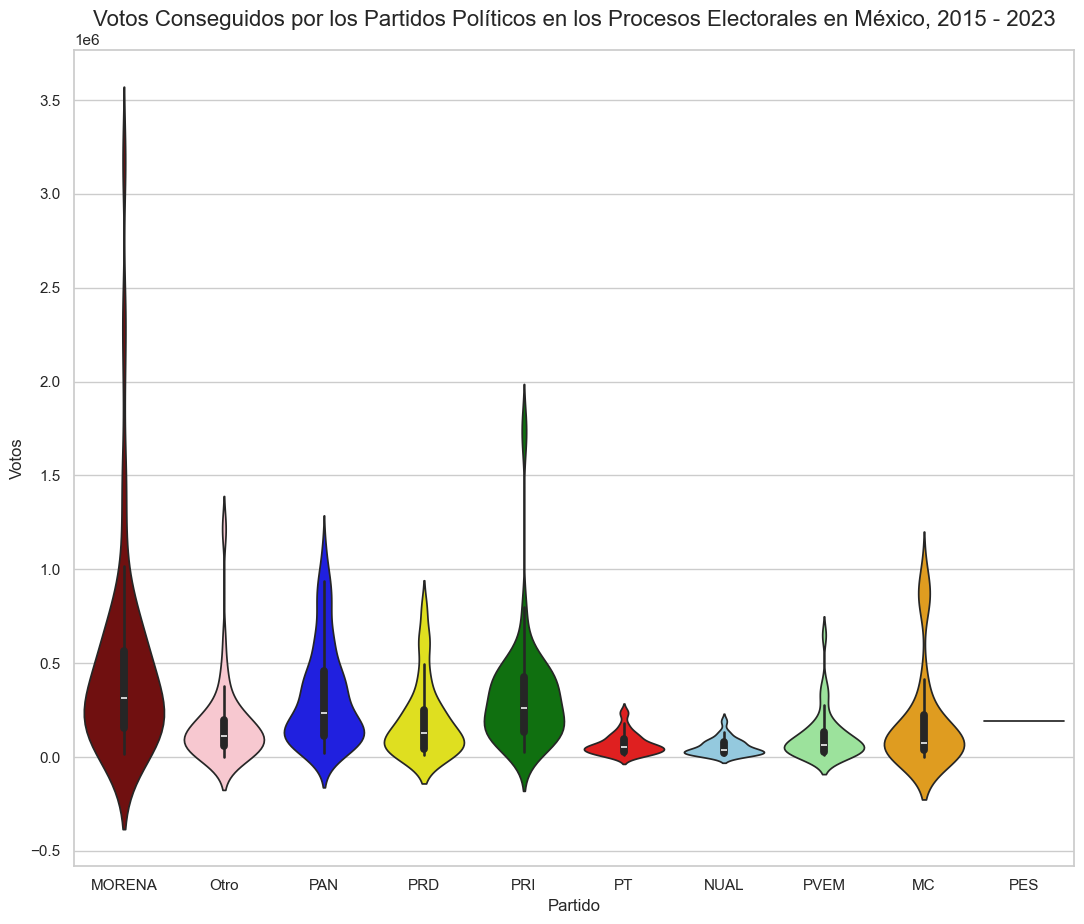

In [91]:
sns.violinplot(
    data = Elecciones,
    x = 'Partido',
    y = 'Votos',
    palette = partido_palette
)

plt.title('Votos Conseguidos por los Partidos Políticos en los Procesos Electorales en México, 2015 - 2023',
          size = 16)
plt.xlabel('Partido')
plt.ylabel('Votos')
plt.tight_layout()
plt.show()

## Violinplot de los Votos Conseguidos por los Partidos Políticos Según el Sexo:

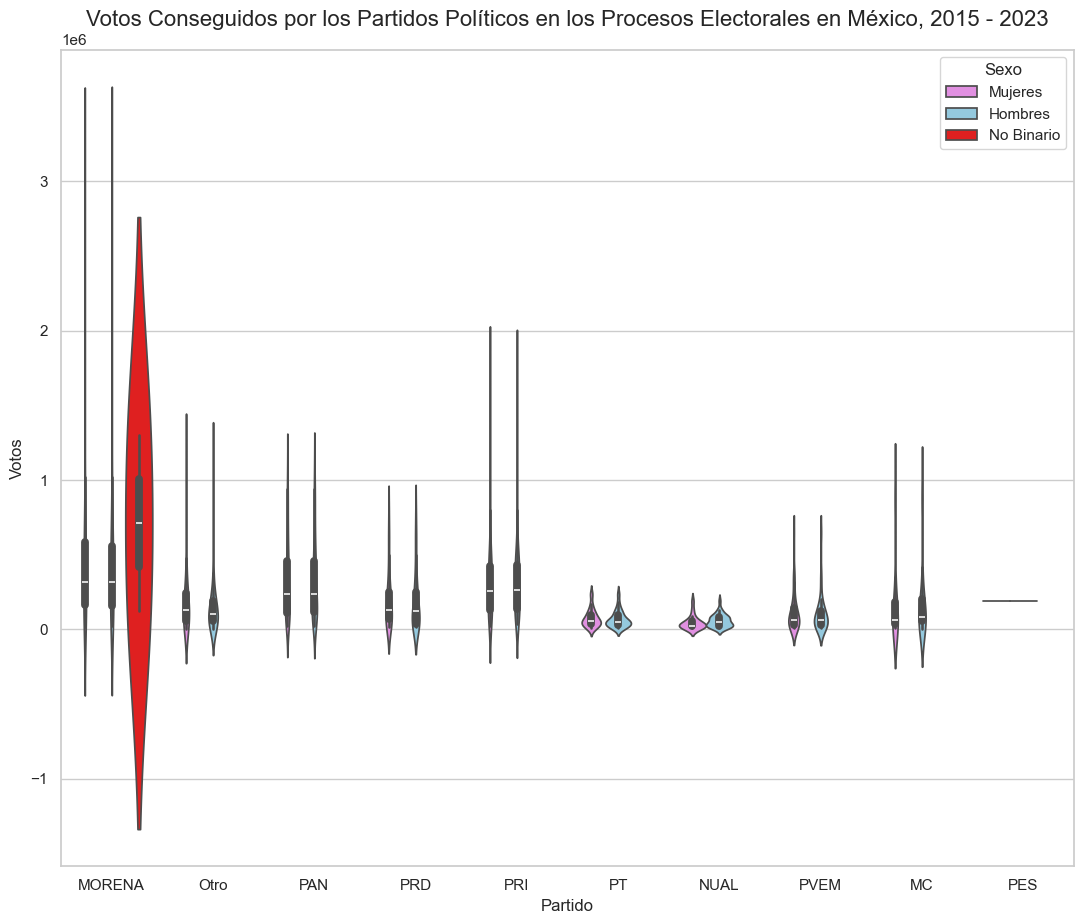

In [92]:
sns.violinplot(
    data = Elecciones,
    x = 'Partido',
    y = 'Votos',
    hue = 'Sexo',
    palette = gender_palette
)

plt.title('Votos Conseguidos por los Partidos Políticos en los Procesos Electorales en México, 2015 - 2023',
          size = 16)
plt.xlabel('Partido')
plt.ylabel('Votos')
plt.tight_layout()
plt.show()

In [93]:
Elecciones.groupby(['Año', 'Partido','Curules']).size().reset_index(name = 'Frecuencia')

,Año,Partido,Curules,Frecuencia
0,2015,MC,1,11
1,2015,MC,2,4
2,2015,MC,3,1
3,2015,MC,4,1
4,2015,MC,6,1
...,...,...,...,...
246,2022,PAN,2,1
247,2022,PRI,8,2
248,2022,PT,1,2
249,2022,PVEM,3,1


## Gráfica de Líneas sobre la participación de la Lista Nominal:

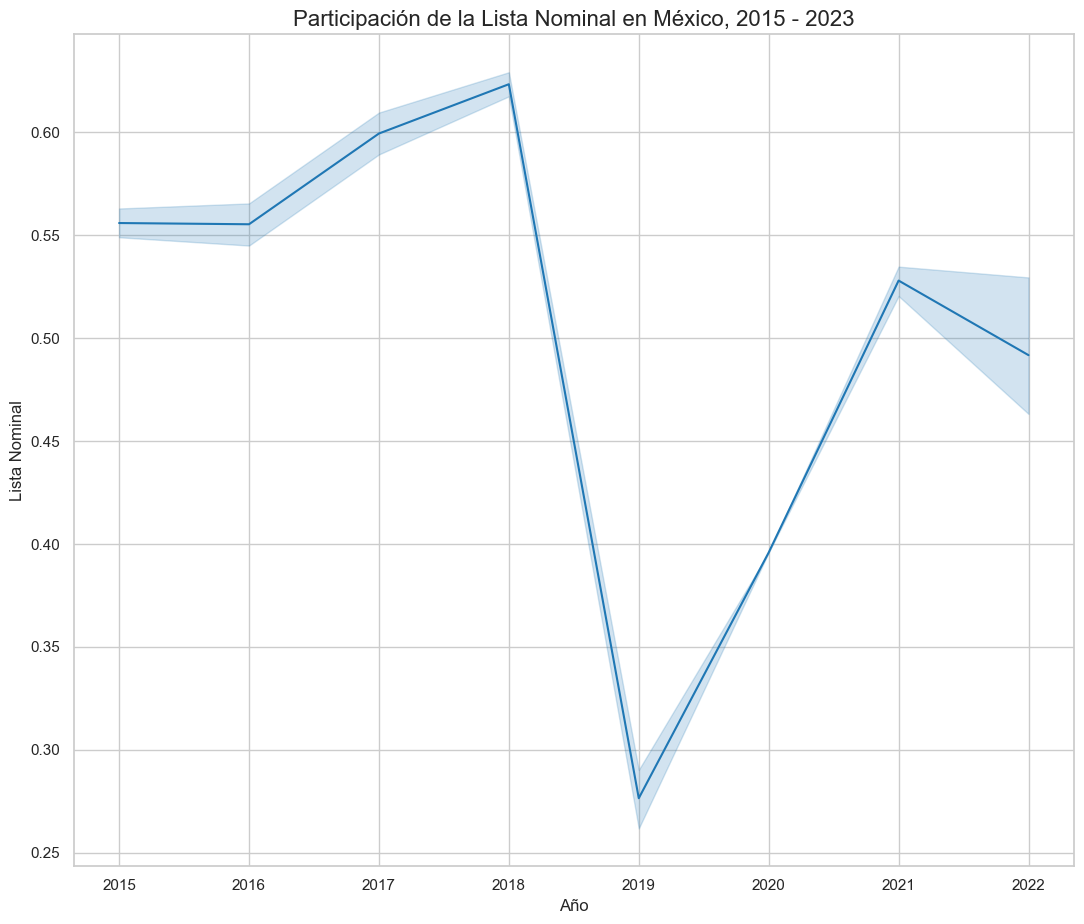

In [120]:
sns.lineplot(
    data = Elecciones,
    x = 'Año',
    y = 'PARTICIPACION'
)

plt.title('Participación de la Lista Nominal en México, 2015 - 2023',
          size = 16)
plt.xlabel('Año')
plt.ylabel('Lista Nominal')
plt.tight_layout()
plt.show()

## Gráfica de Línea entre la Participación de la Lista Nominal Según la Zona:

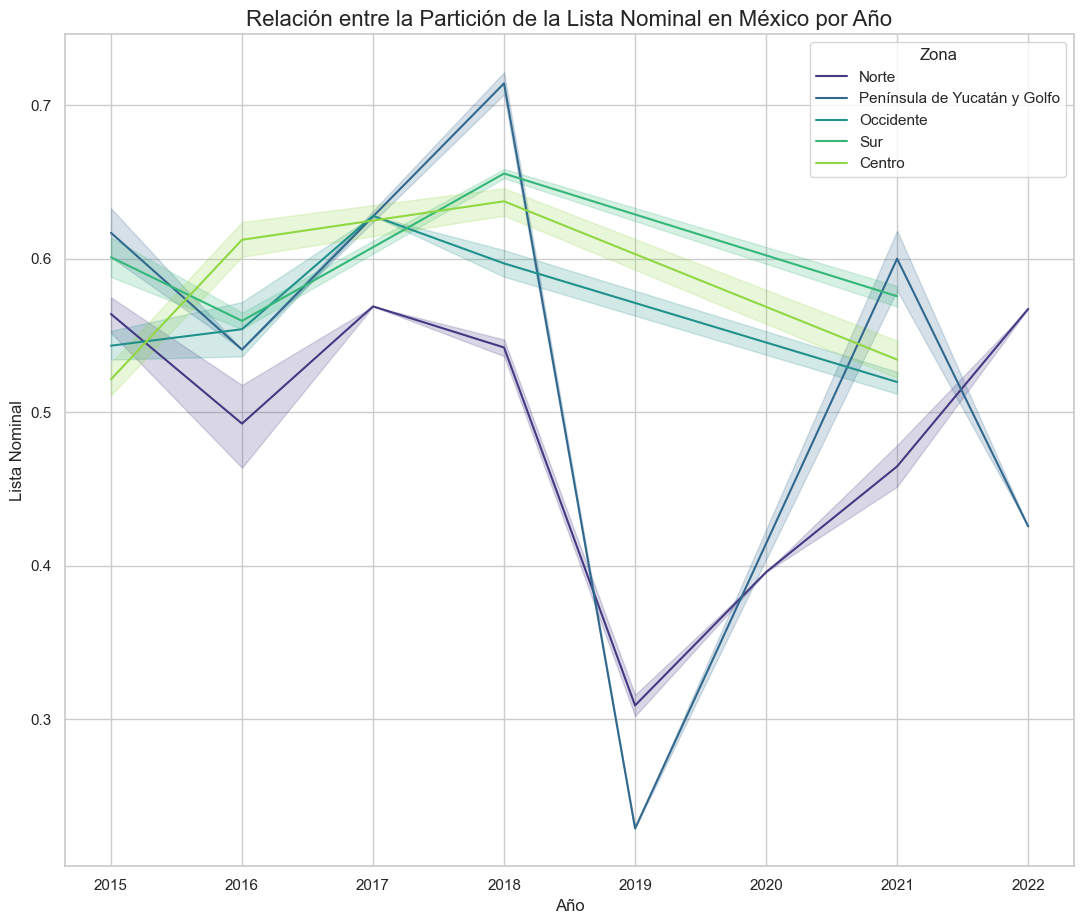

In [121]:
(
    Elecciones
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Año',
            y = 'PARTICIPACION',
            hue = 'Zona',
            palette = 'viridis'
        )
    )
)

plt.title('Relación entre la Partición de la Lista Nominal en México por Año',
          size = 16)
plt.xlabel('Año')
plt.ylabel('Lista Nominal')
plt.tight_layout()
plt.show()

## Matrices de Correlación:

In [97]:
Elecciones.select_dtypes(include= np.number).corr().style.highlight_between(left = 0.30, right = 0.99, color = 'lightgreen')

,Año,ID_ESTADO,Votos,Votos1,Proporcion,Curules,PARTICIPACION
Año,1.000000,0.015063,-0.001706,-0.016338,-0.011407,0.159046,-0.161964
ID_ESTADO,0.015063,1.000000,0.011767,-0.027137,-0.003586,0.000826,0.214947
Votos,-0.001706,0.011767,1.000000,0.639370,0.514721,0.537513,0.121144
Votos1,-0.016338,-0.027137,0.639370,1.000000,-0.059285,0.169646,0.167256
Proporcion,-0.011407,-0.003586,0.514721,-0.059285,1.000000,0.585214,0.005761
Curules,0.159046,0.000826,0.537513,0.169646,0.585214,1.000000,-0.072102
PARTICIPACION,-0.161964,0.214947,0.121144,0.167256,0.005761,-0.072102,1.000000


## Matrices de Correlación:

### Heatmap:

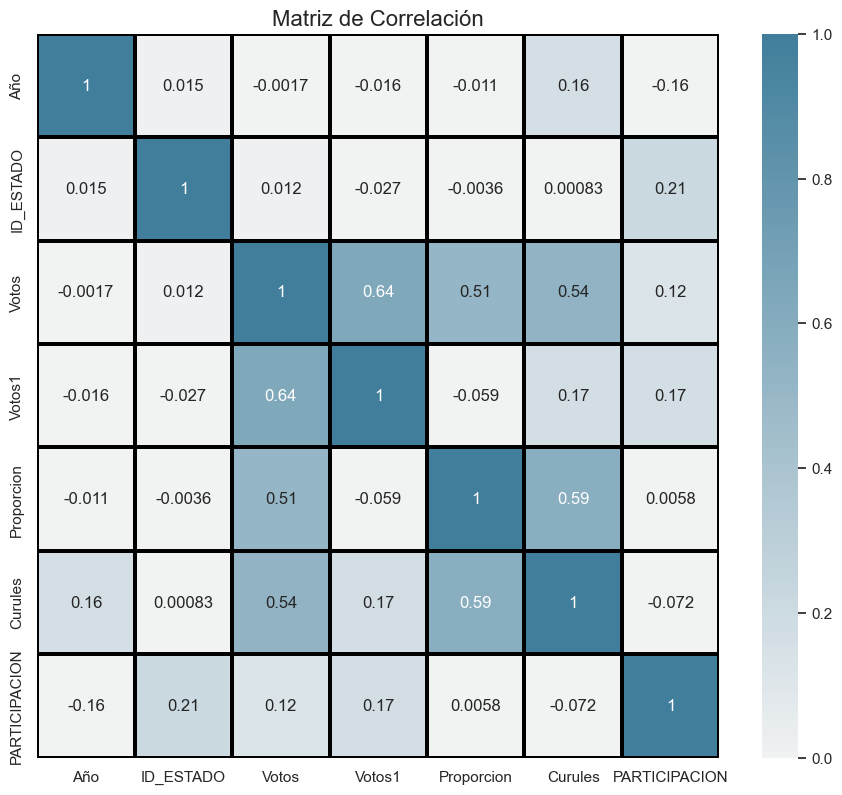

In [98]:
sns.heatmap(
    data=Elecciones.select_dtypes(include = np.number).corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=0,
    vmax=1,
    linecolor='black',
    linewidths=1.5,
    annot=True
)
plt.title('Matriz de Correlación', size = 16)
plt.show()

### Clustermap:

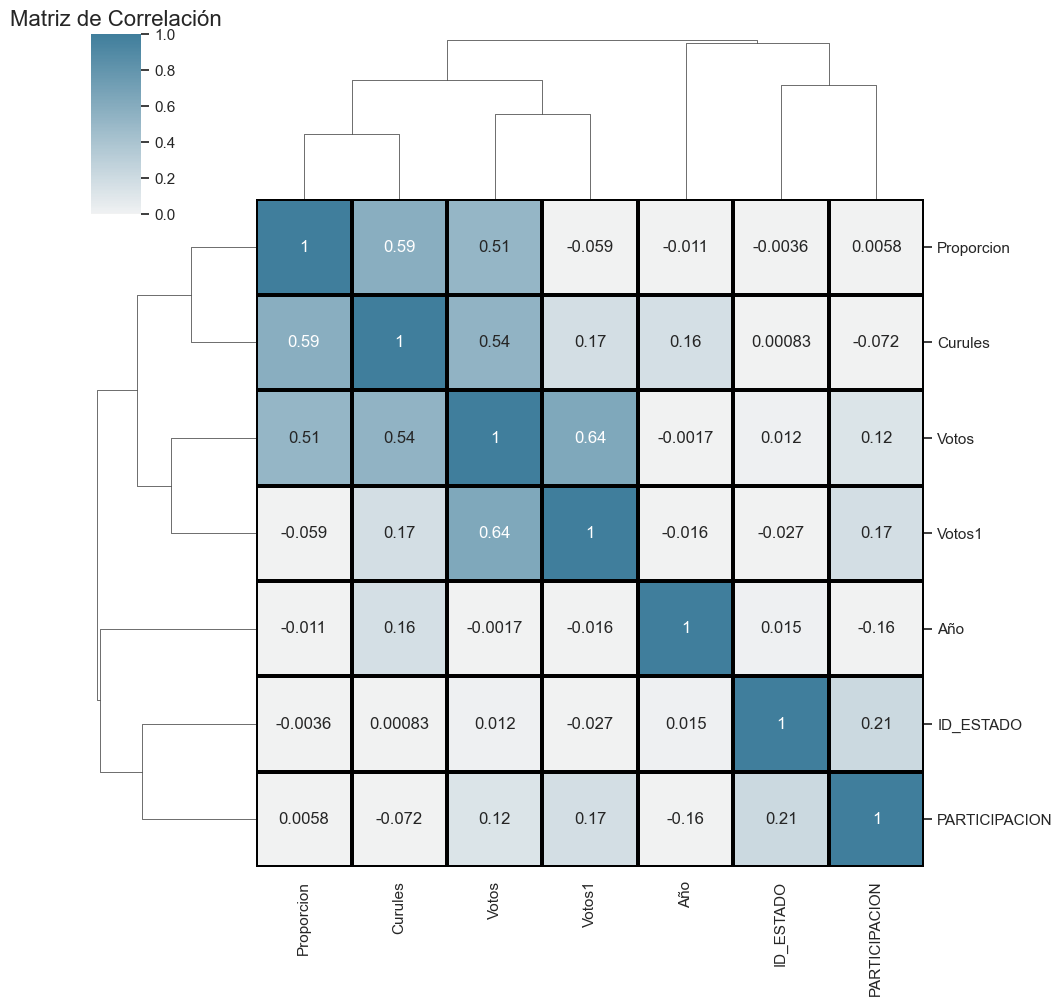

In [99]:
sns.clustermap(
    data=Elecciones.select_dtypes(include= np.number).corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=0,
    vmax=1,
    linecolor='black',
    linewidths=1.5,
    annot=True
)
plt.title('Matriz de Correlación', size = 16)
plt.show()

### Incluimos Variables Categóricas en el Matriz de Correlación:

In [100]:
Elecciones = (
    Elecciones
    .assign(
        numeric_sex=lambda df: 
        df.Sexo.replace(['Hombres', 'Mujeres', 'No Binario'], [0, 1, 0]).astype(int)
    )
)

In [101]:
Elecciones.Partido.value_counts()

Partido
PAN       227
PRI       226
MORENA    206
PRD       119
PVEM      110
Otro      103
PT         98
MC         77
NUAL       53
PES         2
Name: count, dtype: int64

In [102]:
Elecciones = (
    Elecciones
    .assign(
        numeric_partido=lambda df: 
        df.Partido.replace(
            ['PAN', 'PRI', 'MORENA', 'PRD', 'PVEM', 'Otro', 'PT', 'MC', 'NUAL', 'PES'], 
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
        )
        .astype('Int64')
    )
)


### Clustermap Considerando Variables Categóricas:

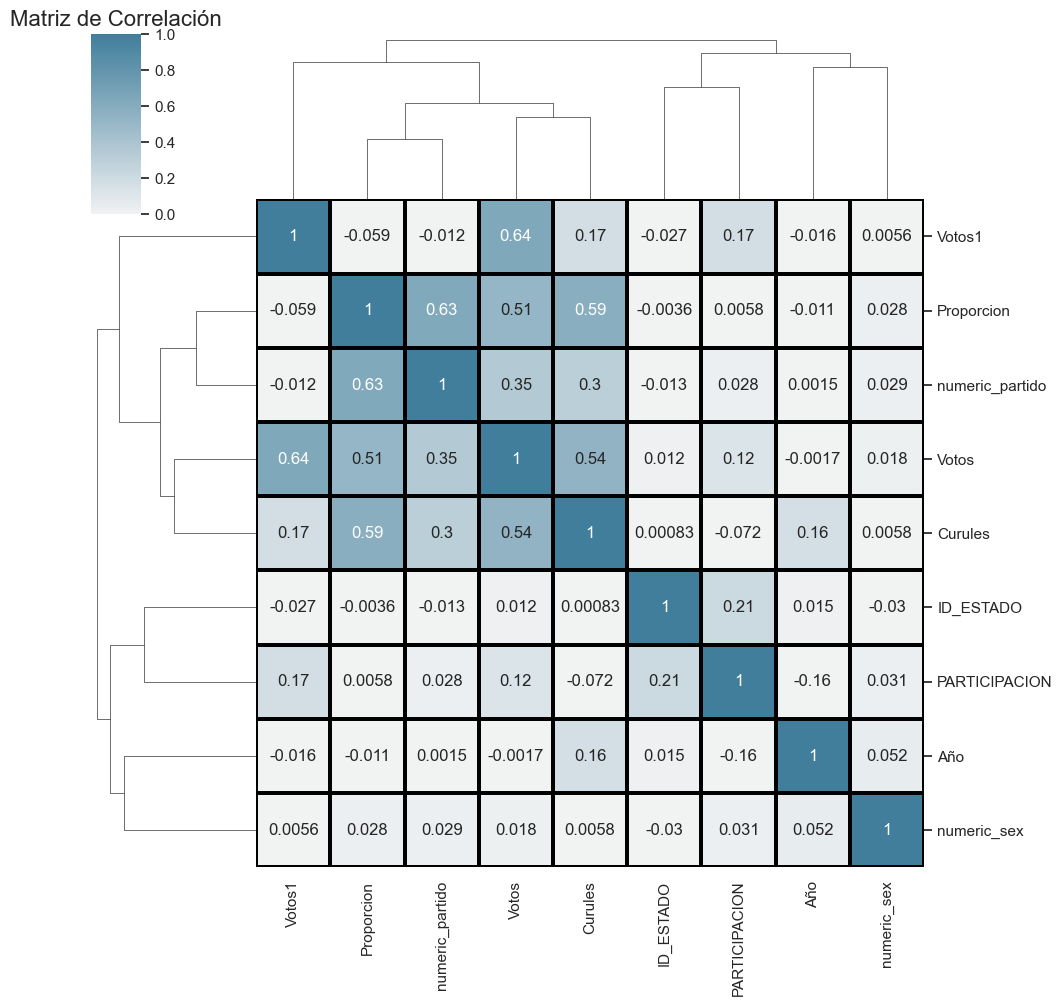

In [103]:
sns.clustermap(
    data=Elecciones.select_dtypes(include = np.number).corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=0,
    vmax=1,
    linecolor='black',
    linewidths=1.5,
    annot=True
)
plt.title('Matriz de Correlación', size = 16)
plt.show()